In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
from dsn.train_dsn import train_dsn
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
system_str = 'V1_circuit';

behavior_str = 'V_same';
param_str = 'h';
T = 20;
dt = 0.5;
init_conds = np.expand_dims(np.array([1.0, 1.1, 1.2, 1.3]), 1);

system_class = system_from_str(system_str);
system = system_class(behavior_str, param_str, T, dt, init_conds);

basedir = '/Users/sbittner/Documents/dsn/dsn/results/';

fontsize = 14;

No handles with labels found to put in legend.


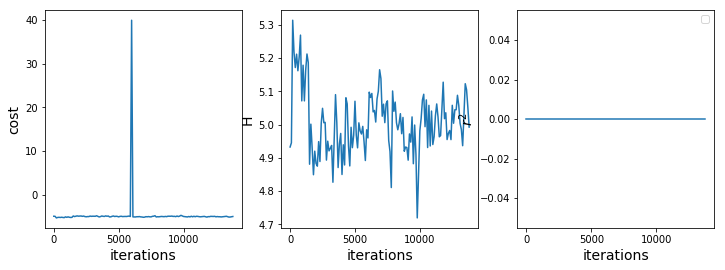

In [3]:
savedir = basedir + system_str + '/' \
          'V1_circuit_D=8_T=20_flow=M_10P_sigma=1.00_lr_order=-3_c=-5_rs=0/';

fname = savedir + 'results.npz';

npzfile = np.load(fname);
check_rate = npzfile['check_rate'];
costs = npzfile['costs'];
Hs = npzfile['Hs'];
R2s = npzfile['R2s'];
mean_T_phis = npzfile['mean_T_phis'];
mu = npzfile['mu'];
behavior = npzfile['behavior'];

phis = npzfile['phis'];
T_phis = npzfile['T_phis'];
mean_T_phis = npzfile['mean_T_phis'];
log_q_phis = npzfile['log_q_phis'];
last_ind = npzfile['it']//check_rate;
k_max = phis.shape[0]-1;

nits = costs.shape[0];
iterations = np.arange(0, check_rate*nits, check_rate);

plt.figure(figsize=(12,4));
plt.subplot(1,3,1);
plt.plot(iterations[:last_ind], costs[:last_ind]);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('cost', fontsize=fontsize);

plt.subplot(1,3,2);
plt.plot(iterations[:last_ind], Hs[:last_ind]);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('H', fontsize=fontsize);

plt.subplot(1,3,3);
plt.plot(iterations[:last_ind], R2s[:last_ind]);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel(r'$r^2$', fontsize=fontsize);

plt.legend();

plt.show();

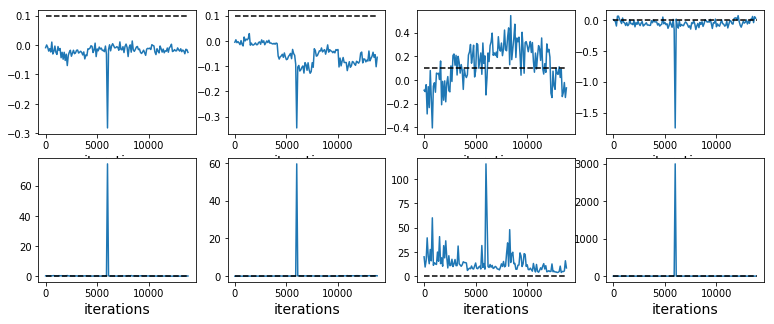

In [4]:
plt.figure(figsize=(13,5));
last_ind = npzfile['it']//check_rate;
num_suff_stats = mean_T_phis.shape[1];
for i in range(num_suff_stats):
    plt.subplot(2,4,i+1);
    plt.plot(iterations[:last_ind], mean_T_phis[:last_ind,i]);
    plt.plot([iterations[0], iterations[last_ind]], [mu[i], mu[i]], 'k--');
    plt.xlabel('iterations', fontsize=fontsize);
    #plt.ylabel(constraint_names[i], fontsize=fontsize);
        
        
plt.show();

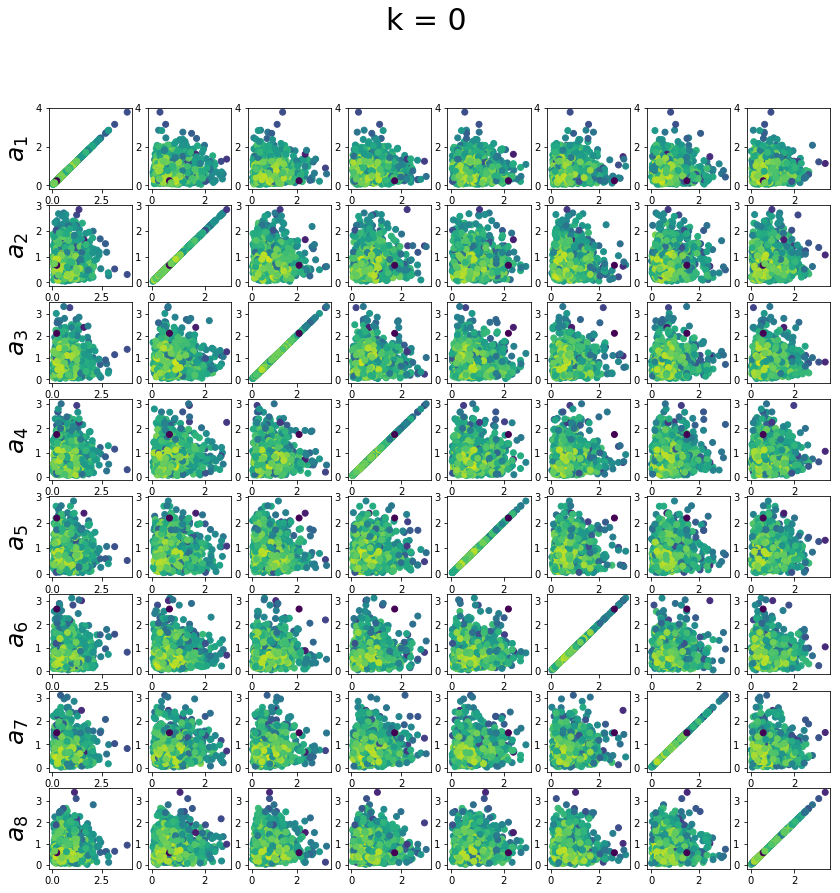

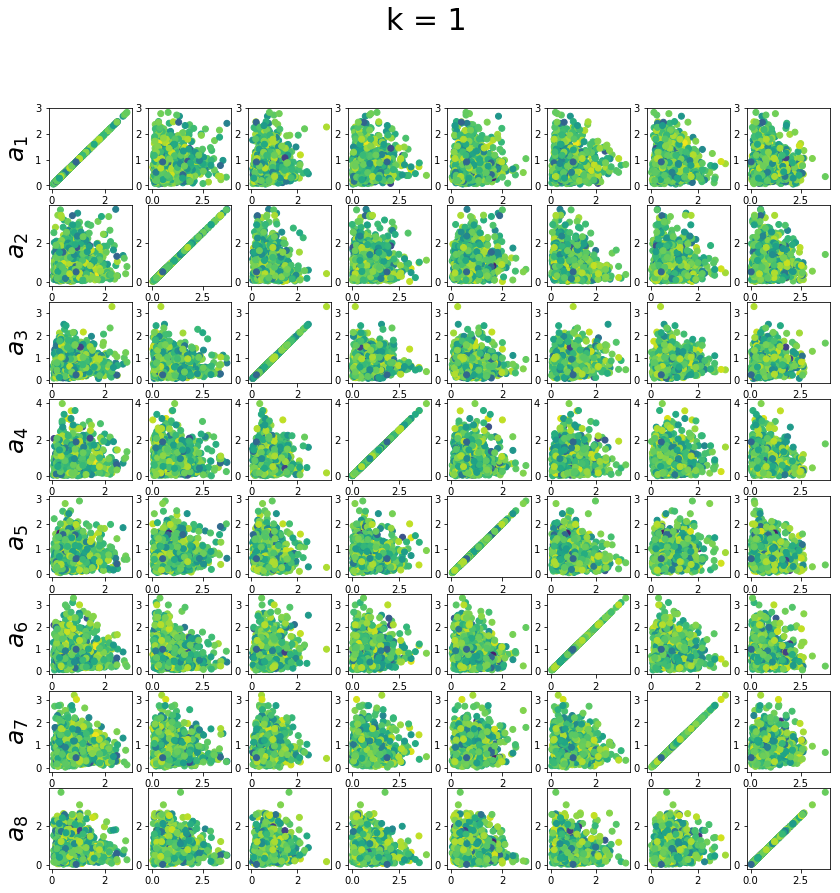

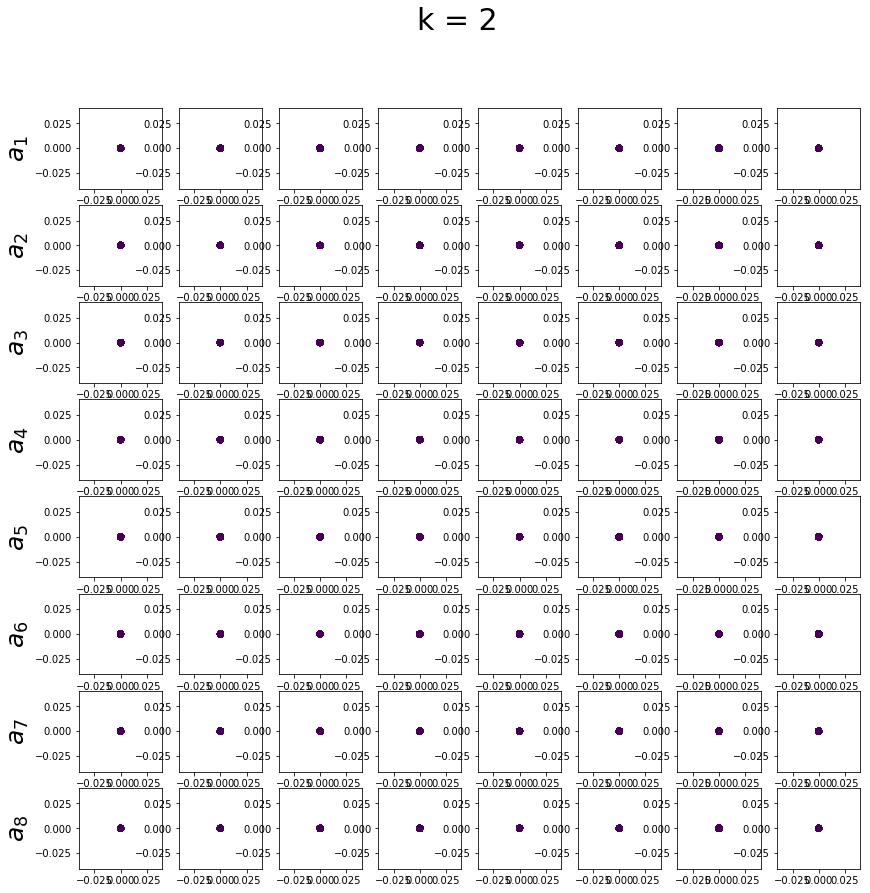

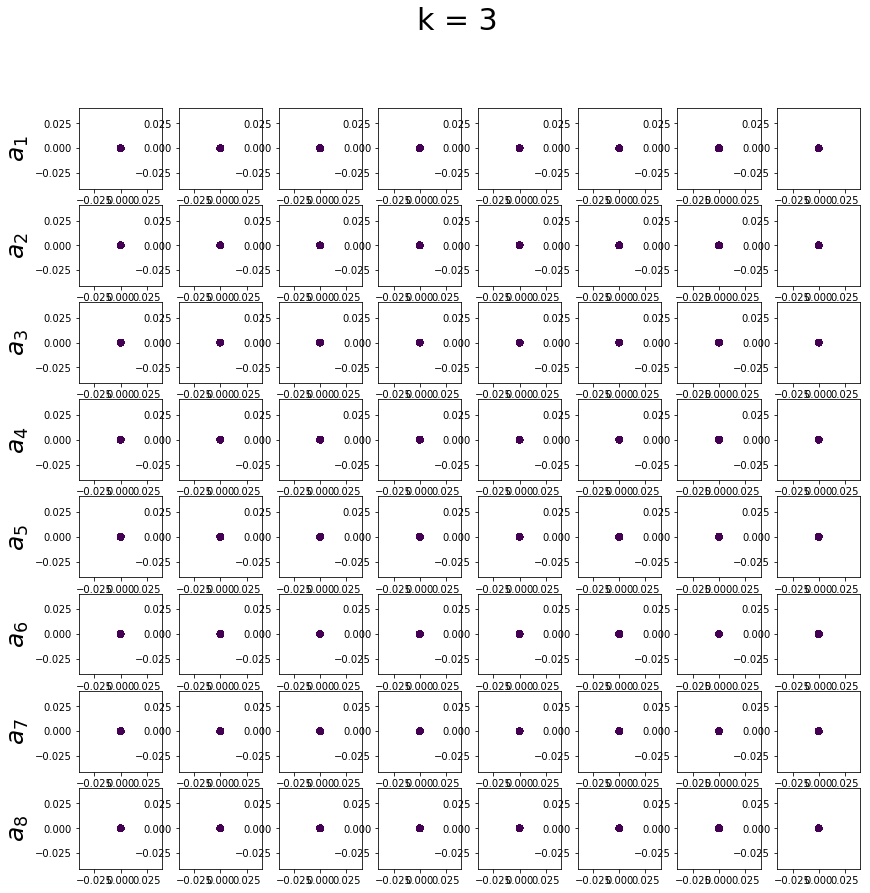

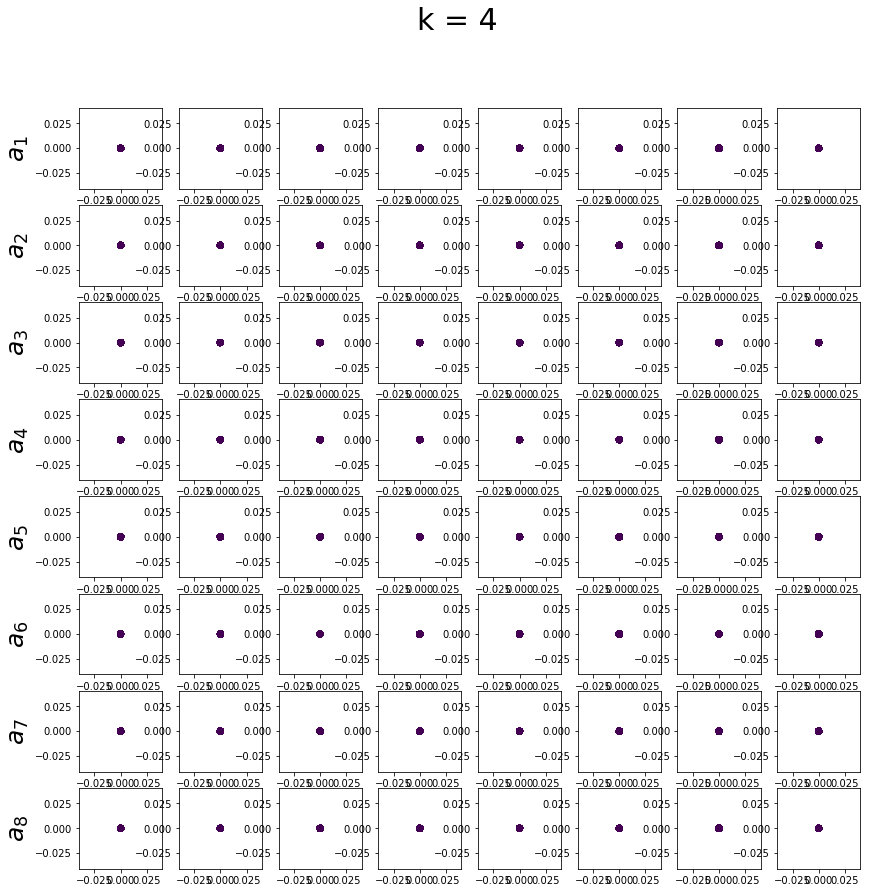

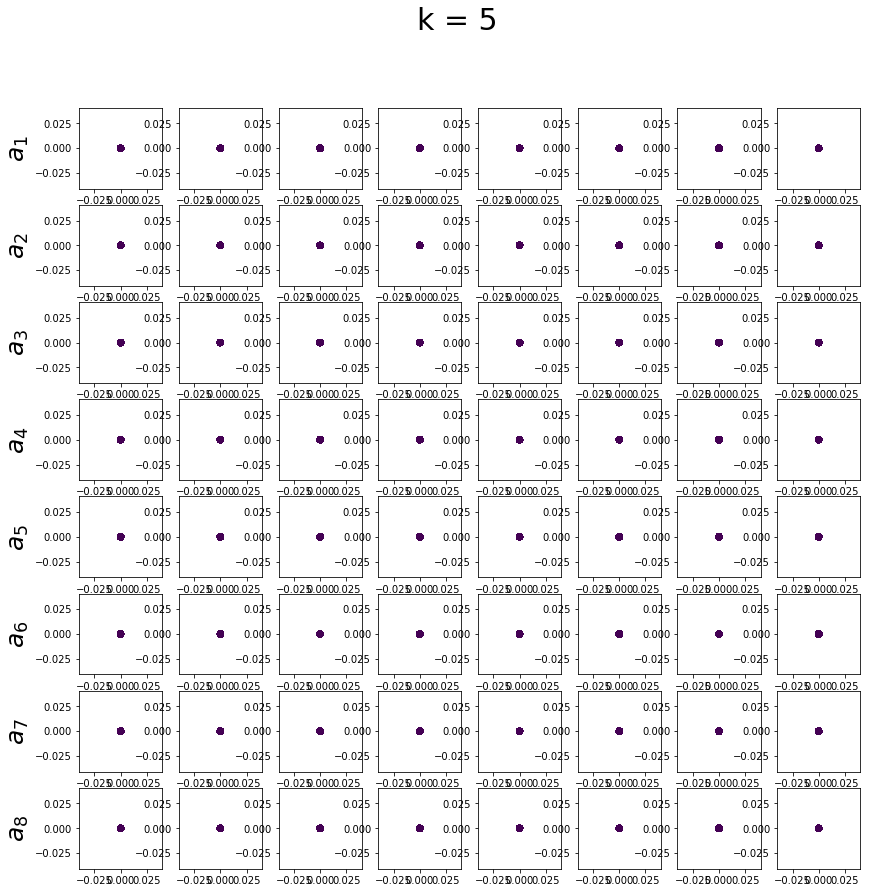

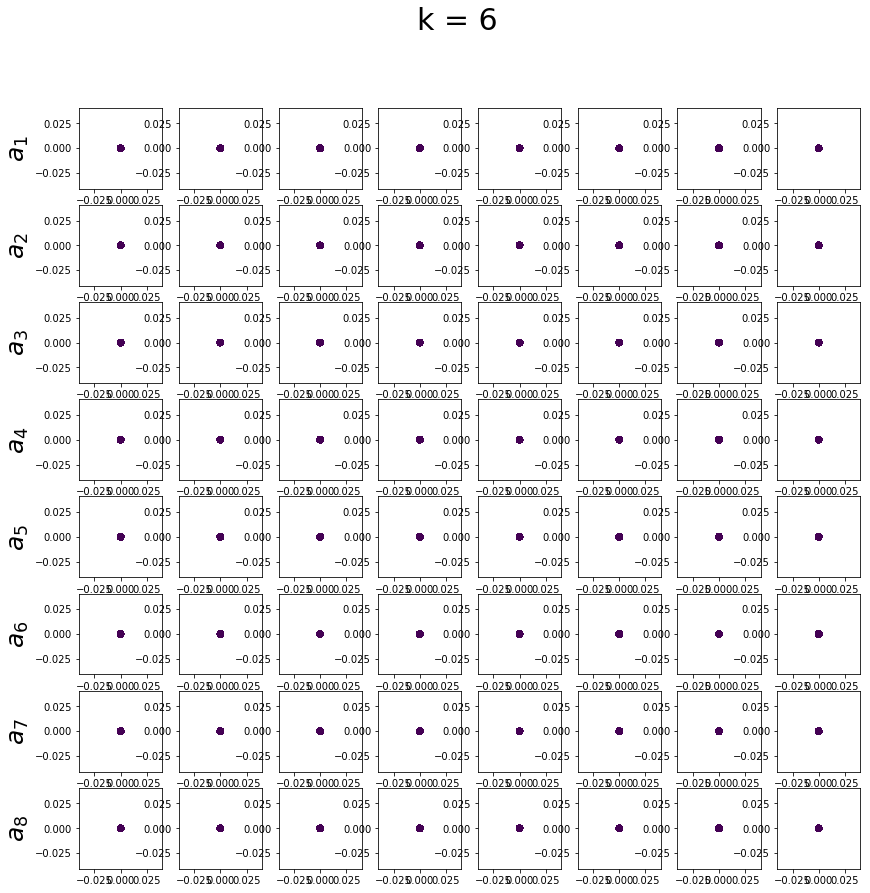

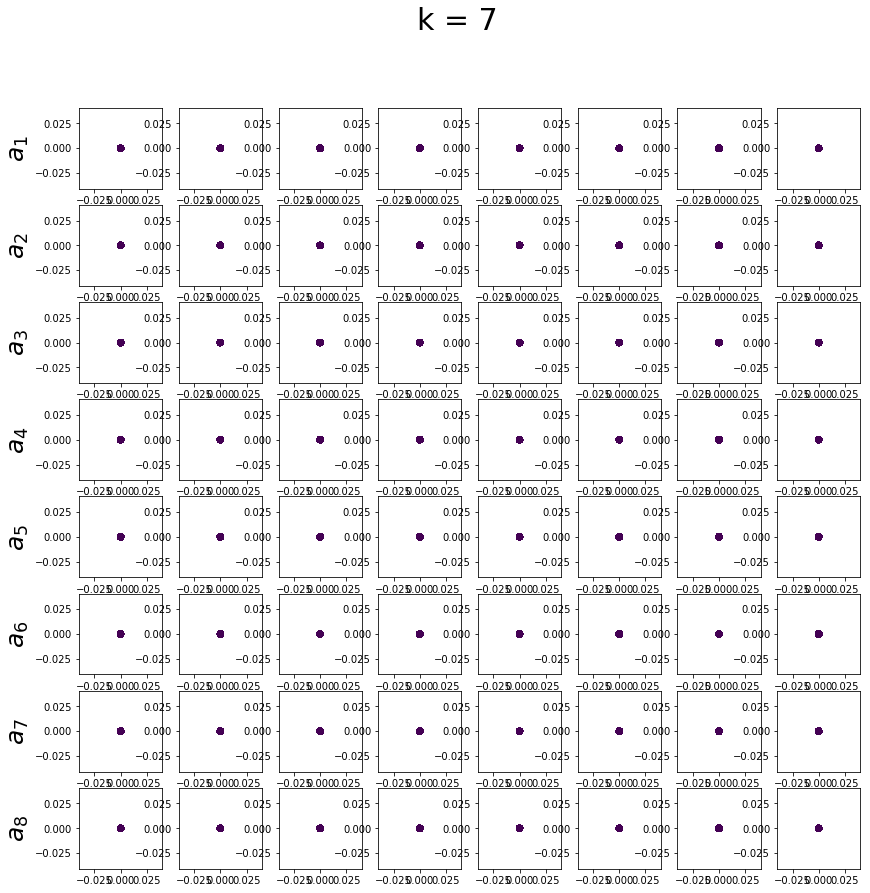

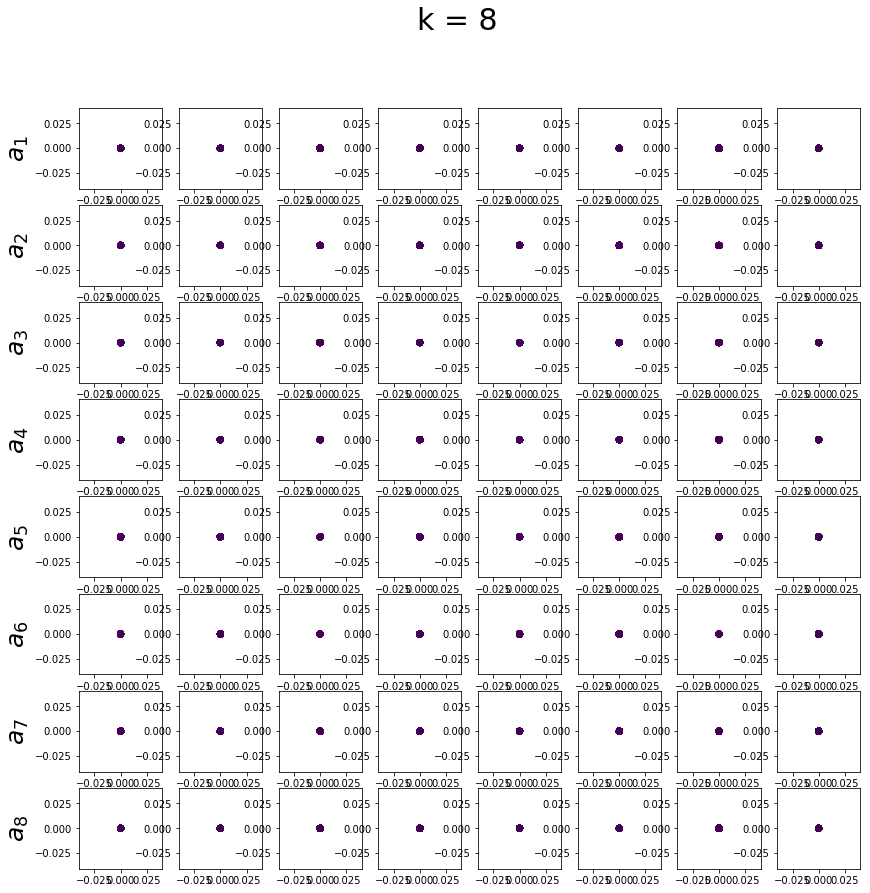

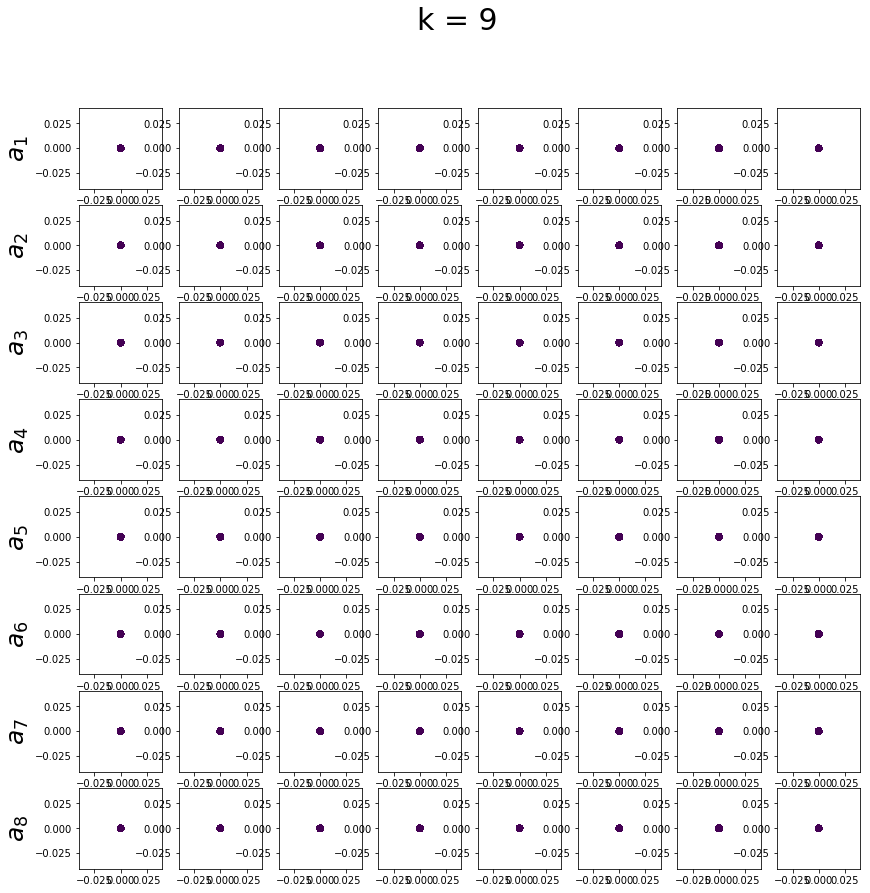

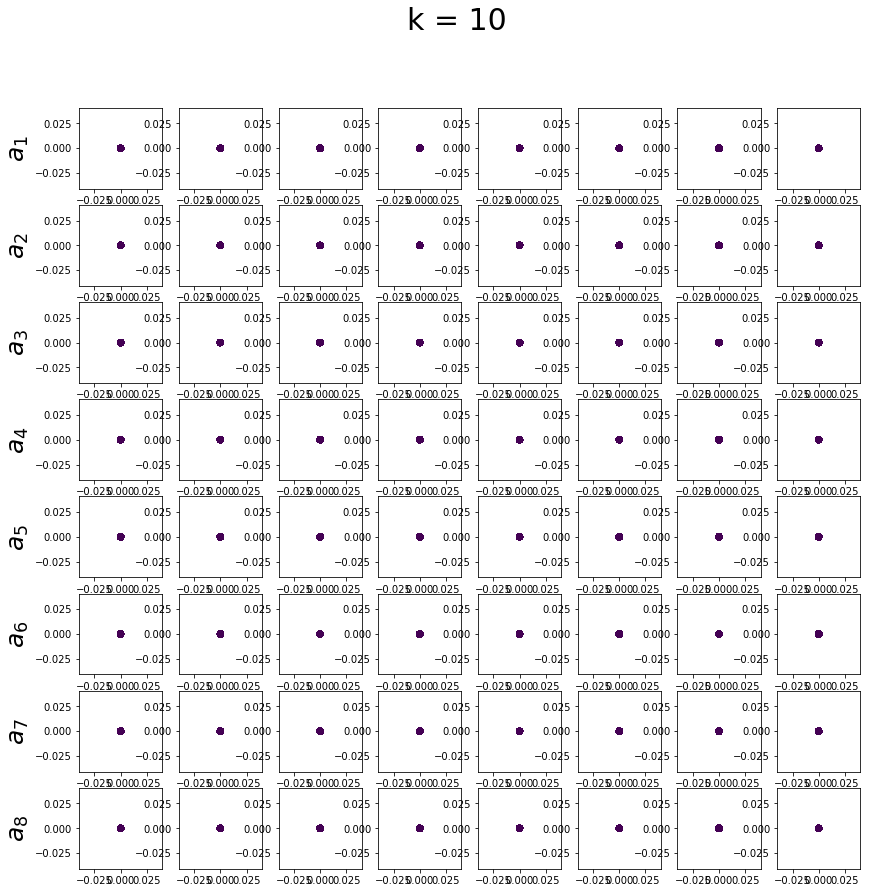

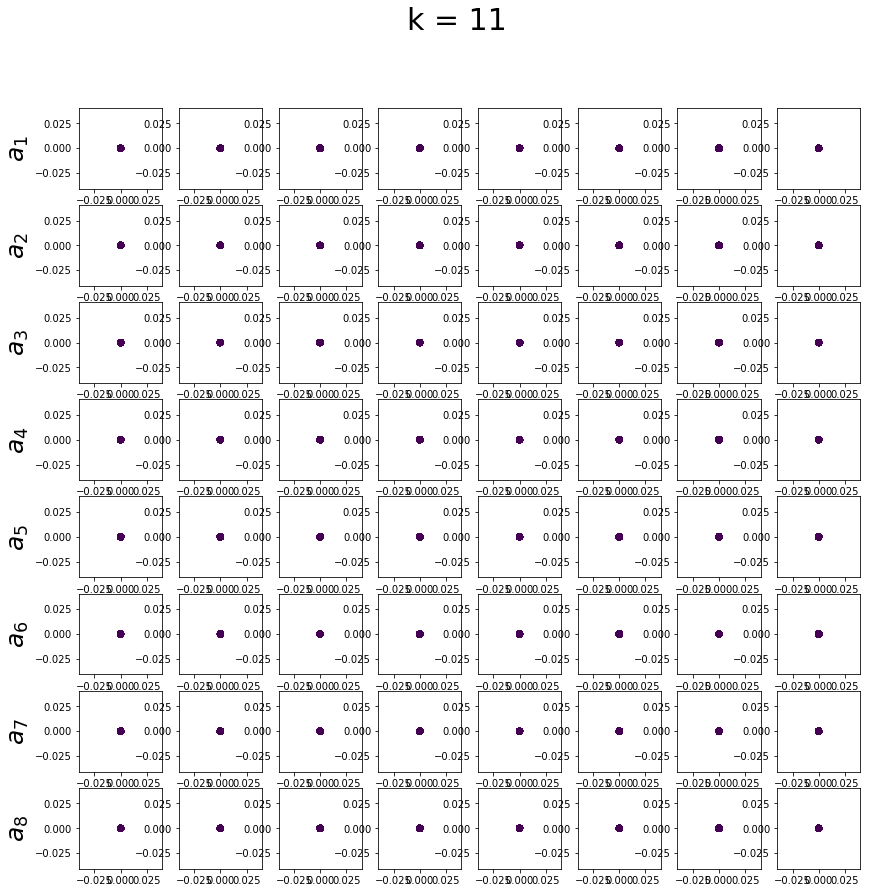

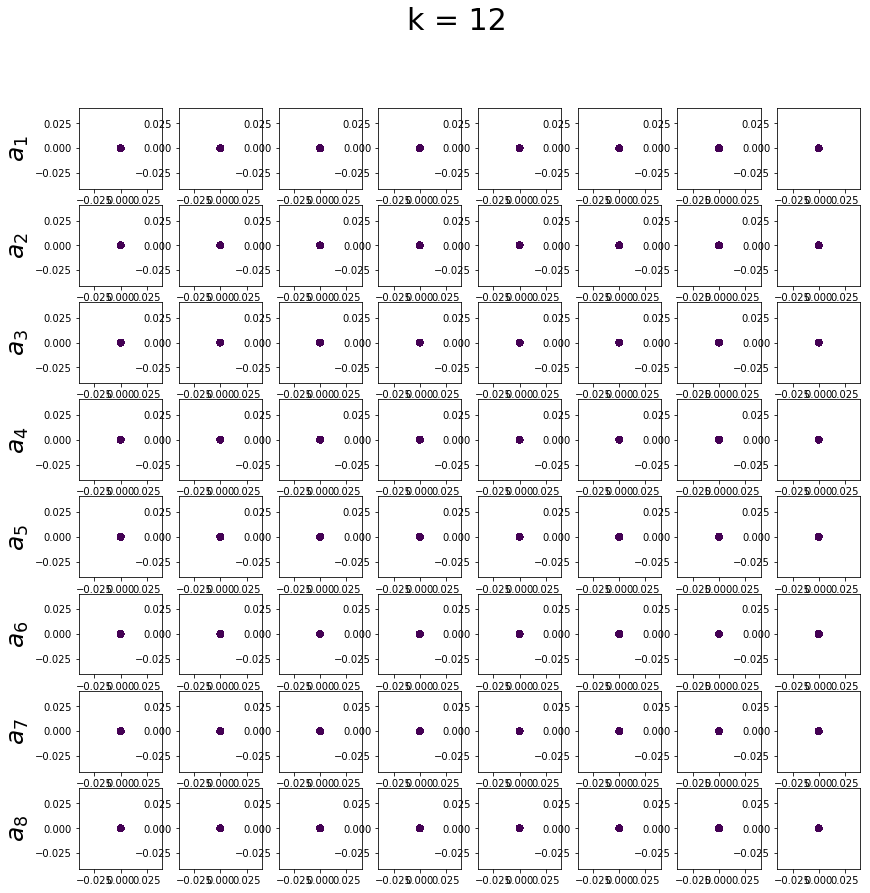

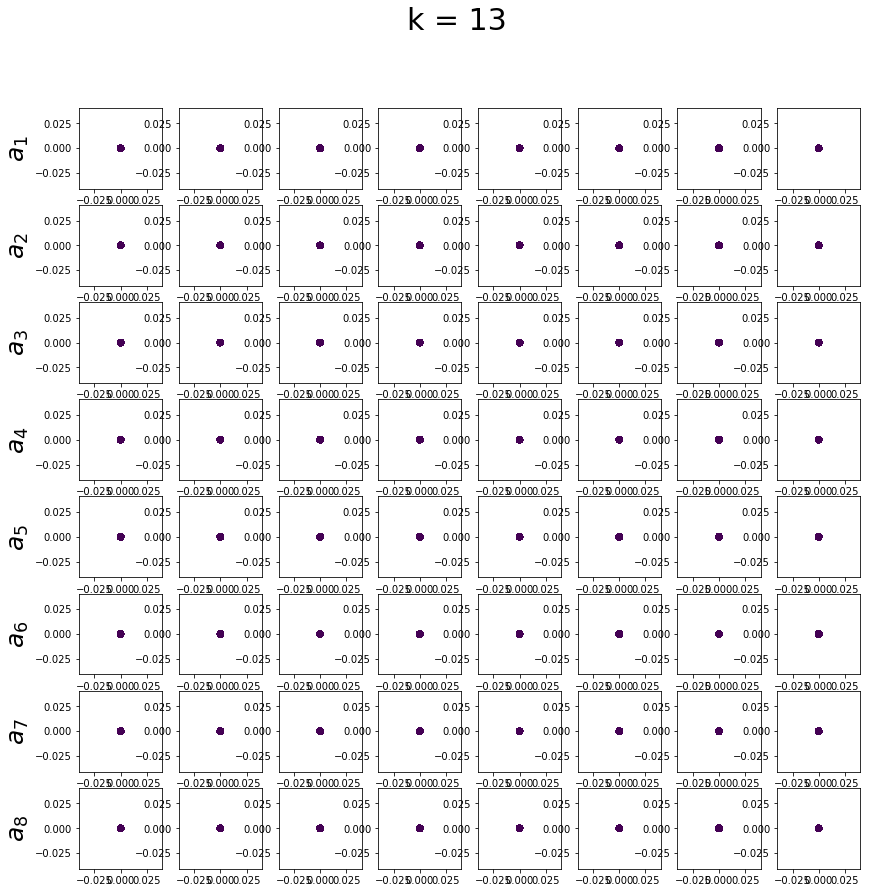

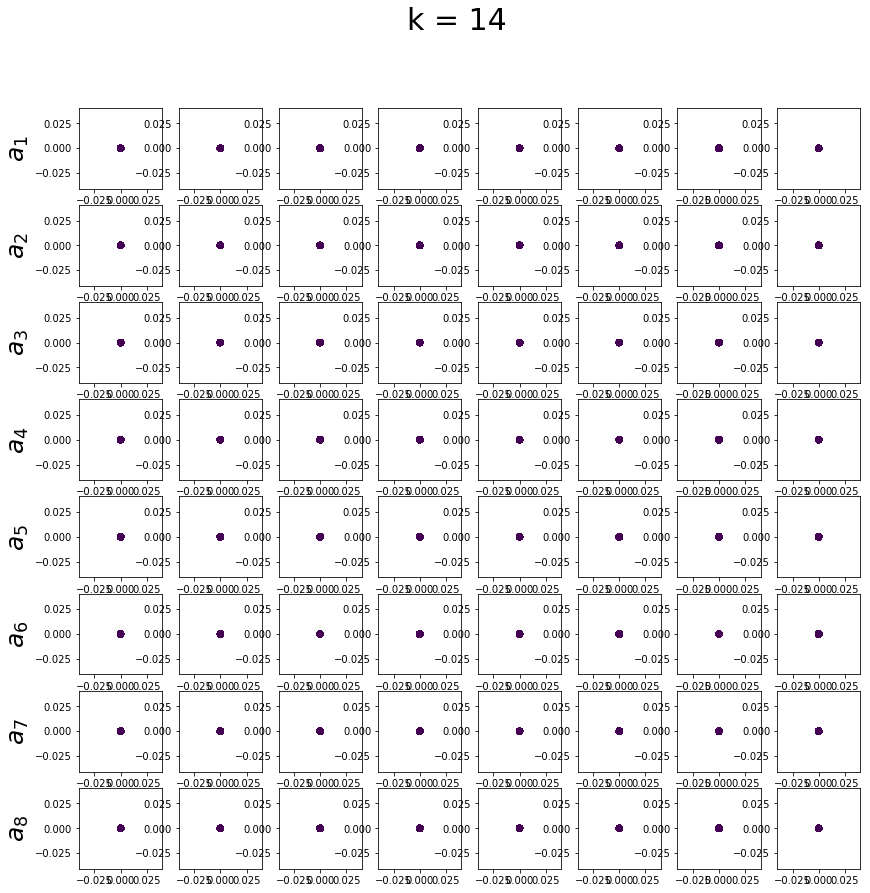

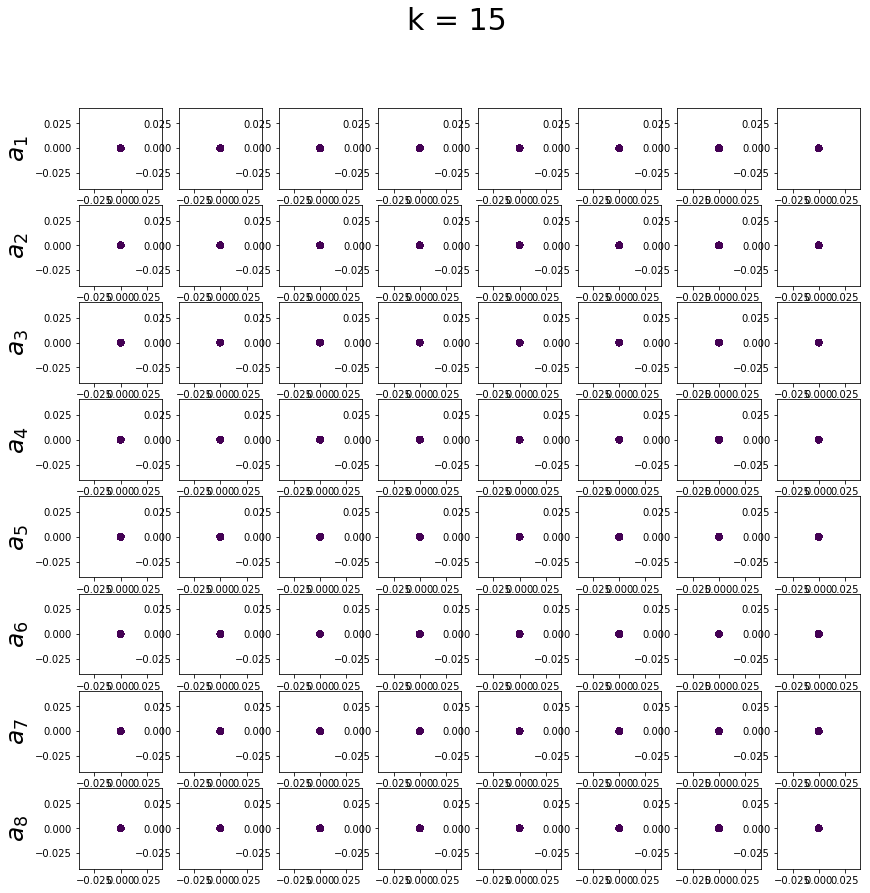

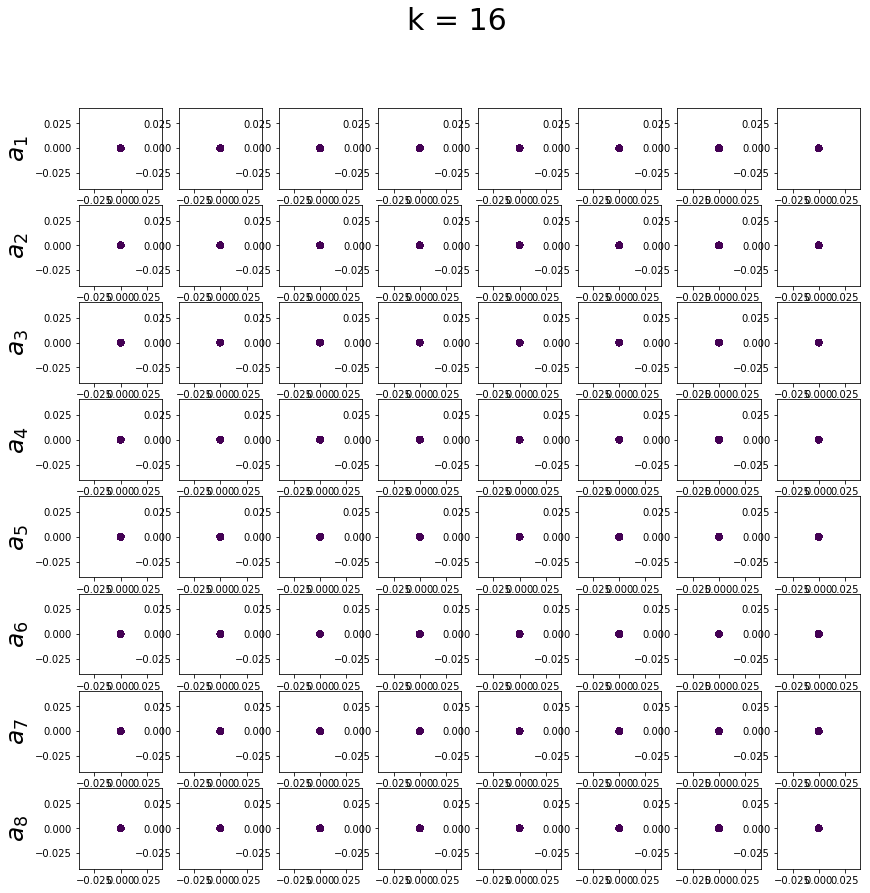

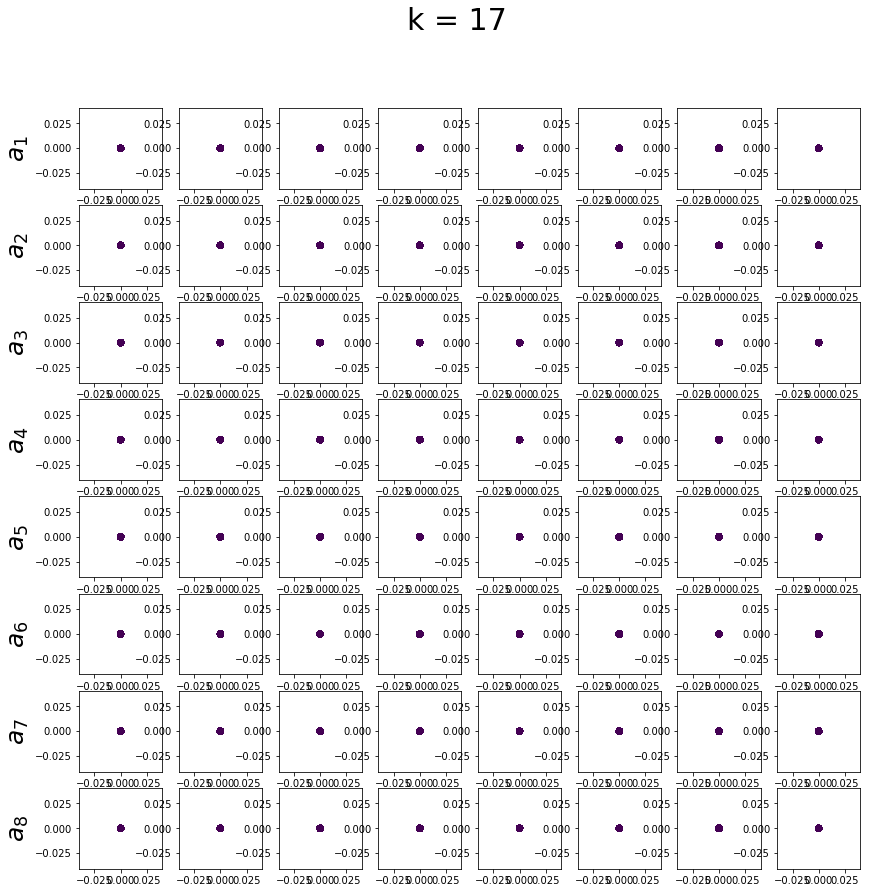

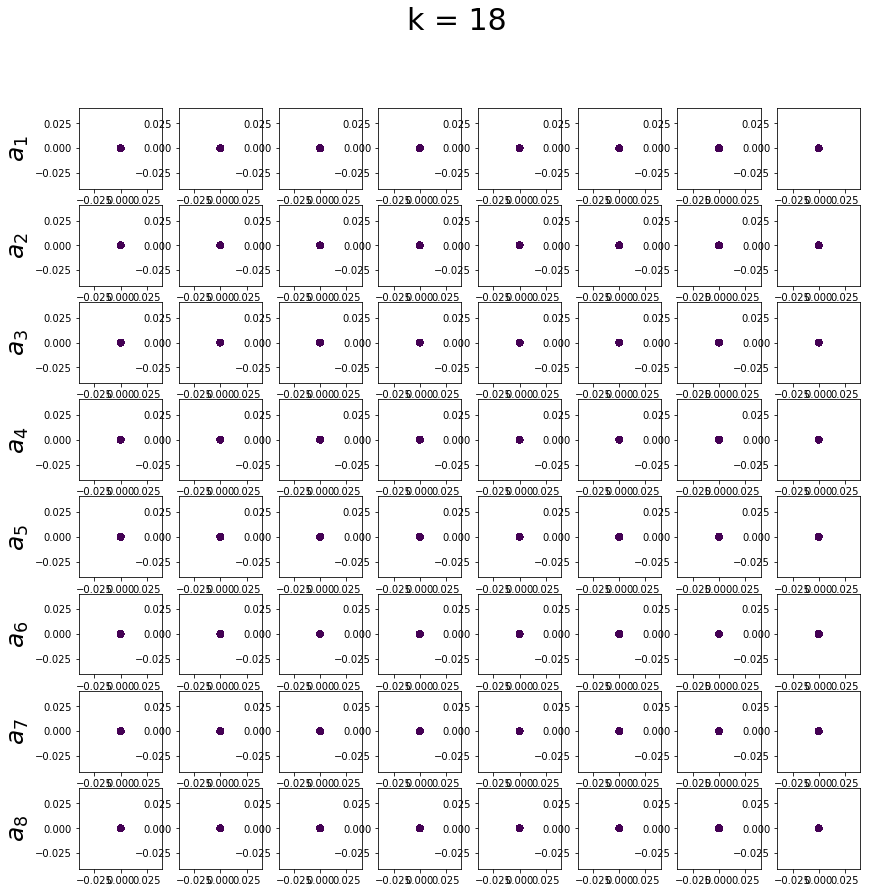

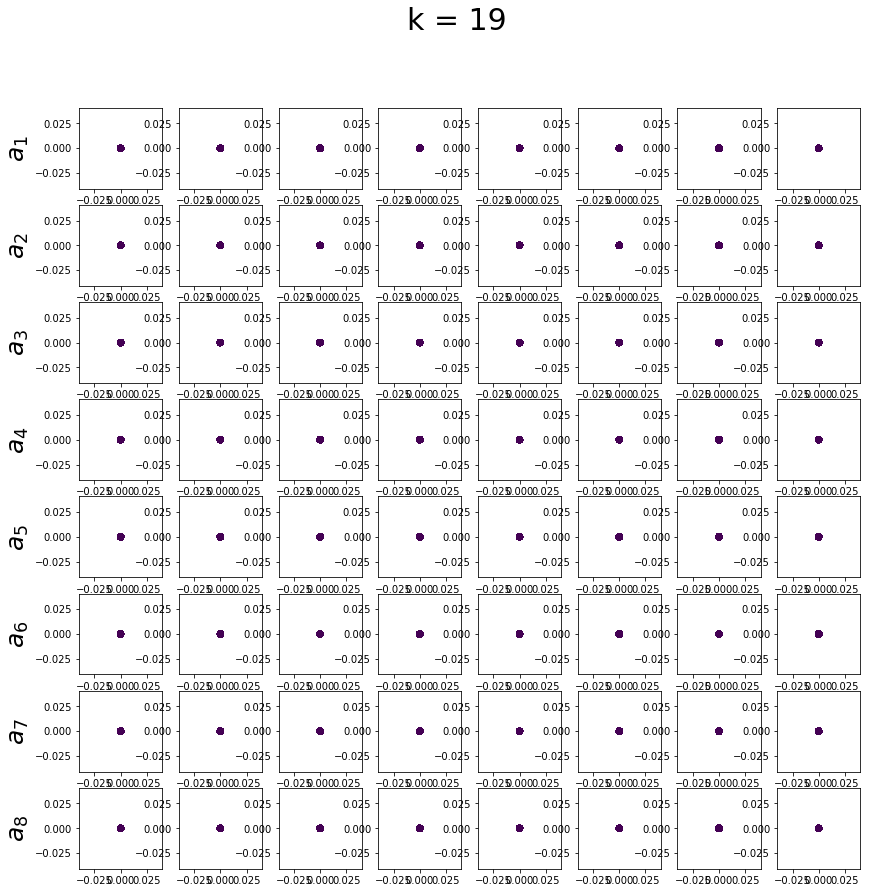

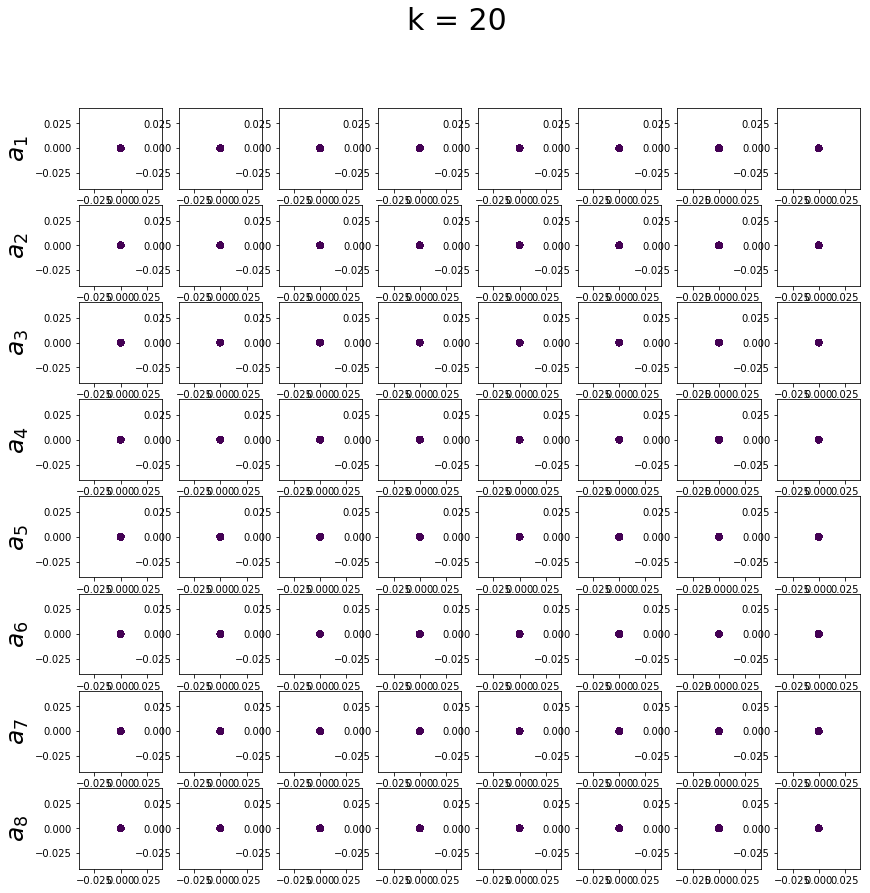

In [5]:
T_phis = npzfile['T_phis'];
phis = npzfile['phis'];
log_q_phis = npzfile['log_q_phis'];

for k in range(k_max+1):
    fontsize = 25;
    figsize = (14, 14);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        for j in range(system.D):
            ind = system.D*i + j + 1;
            plt.subplot(system.D, system.D, ind);
            plt.scatter(phis[k,:,j], phis[k, :, i], c=log_q_phis[k]);
            if (i==3):
                plt.xlabel(r'$a_%d$' % (j+1), fontsize=fontsize);
            if (j==0):
                plt.ylabel(r'$a_%d$' % (i+1), fontsize=fontsize);
    plt.suptitle('k = %d' % k, fontsize=30);

    plt.show();


-0.008947655363320437 0
-0.005408239144347668 0
-0.08581856451932338 0
0.0046516736814879904 0
0.23415451946270072 0
0.02885607744828465 0
19.94335088612429 0
0.5735279639807367 0


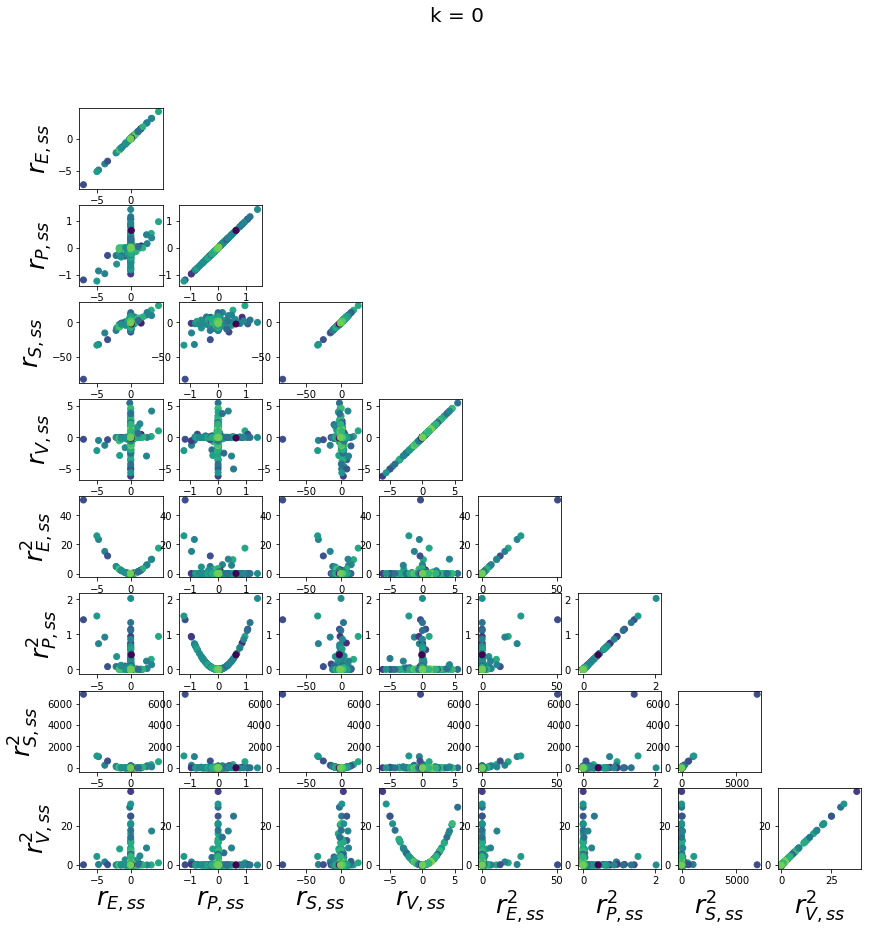

-0.027180338444183452 0
-0.03534323518362668 0
0.3547096290592881 0
-0.11689192146167997 0
0.09946297449860085 0
0.08370184703958285 0
8.428582982283038 0
1.5375792418980625 0


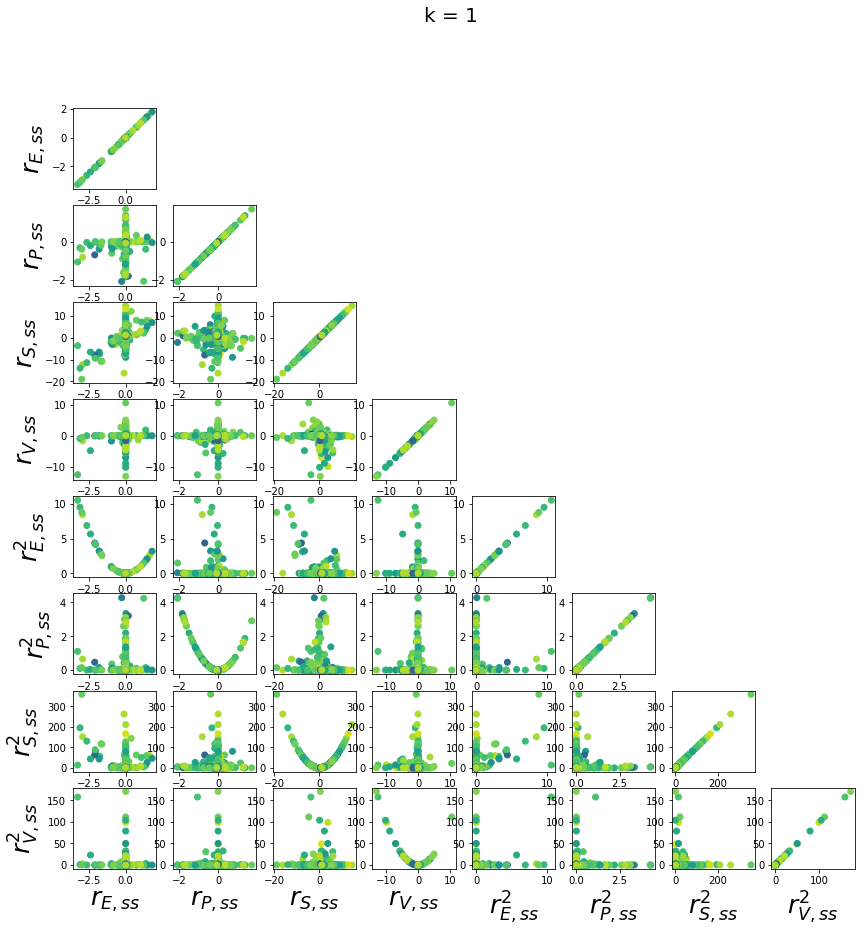

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


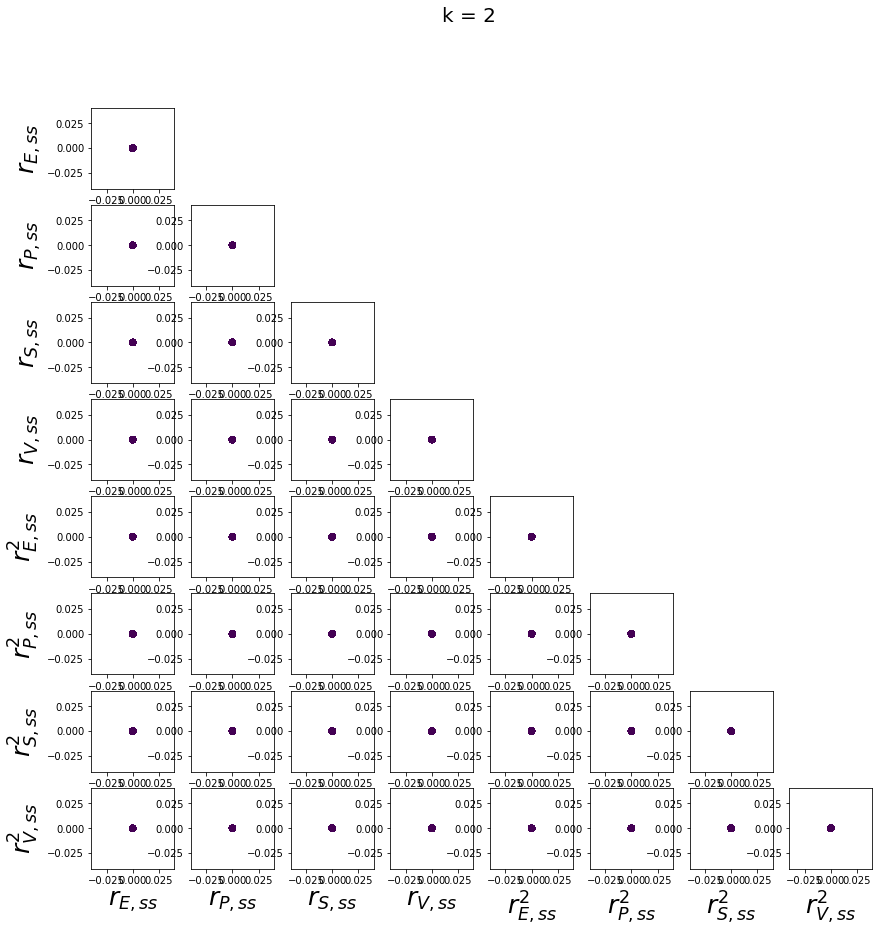

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


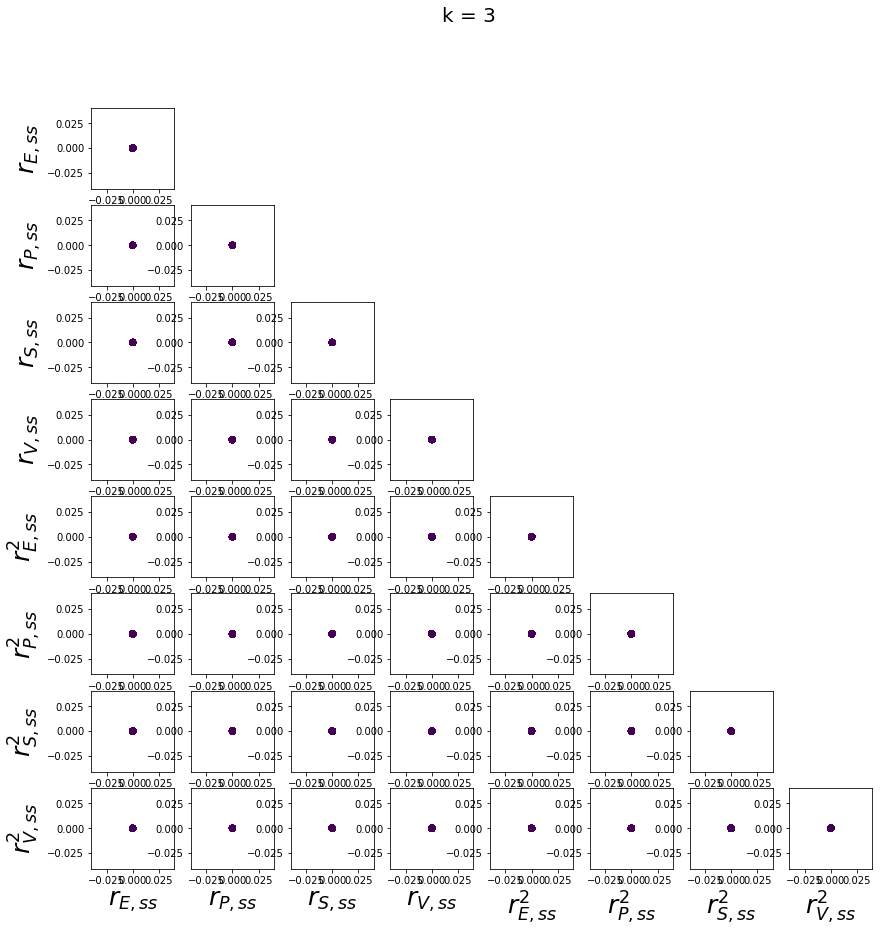

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


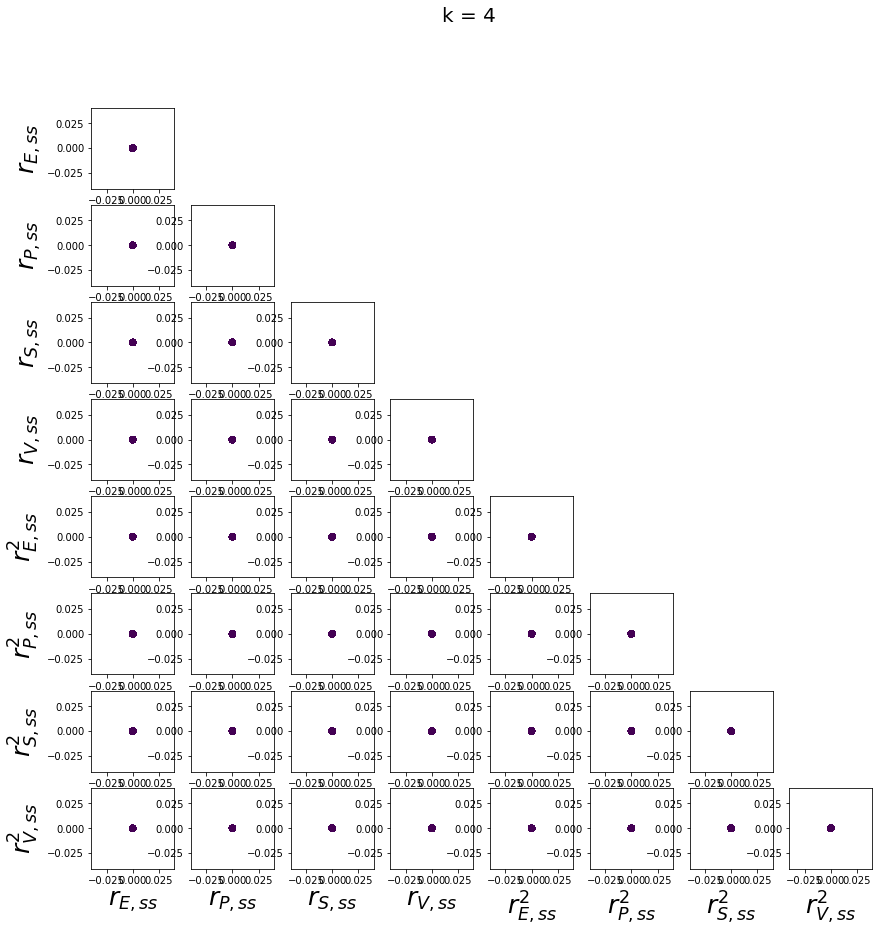

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


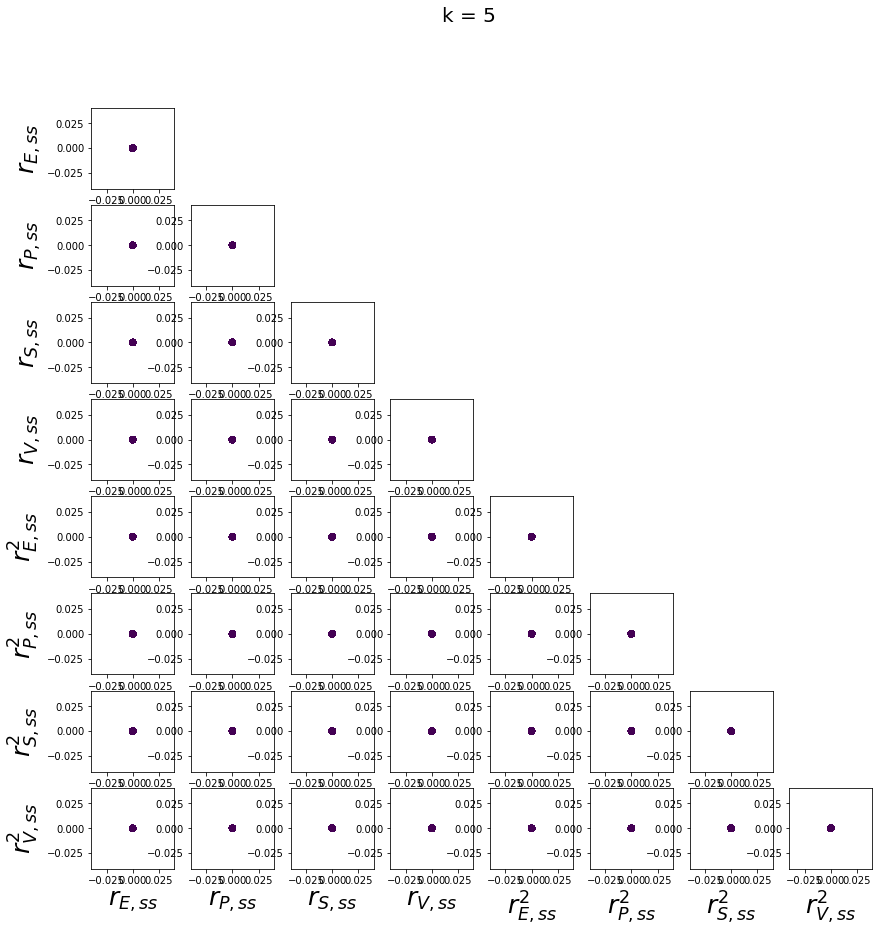

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


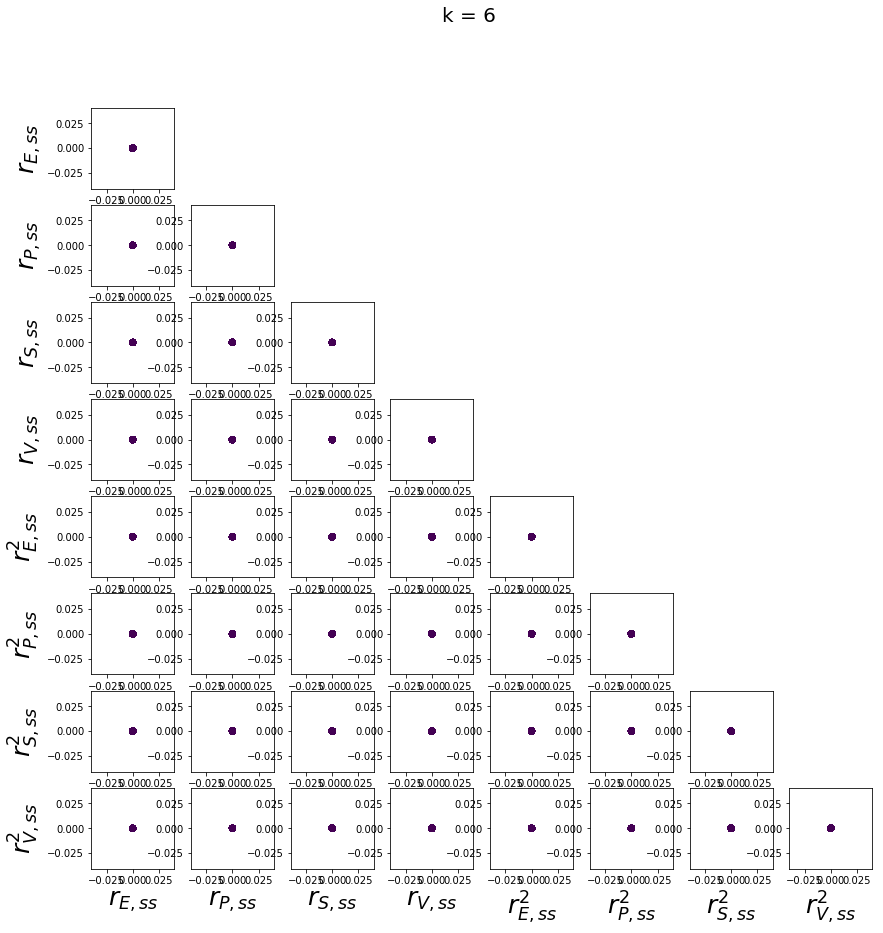

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


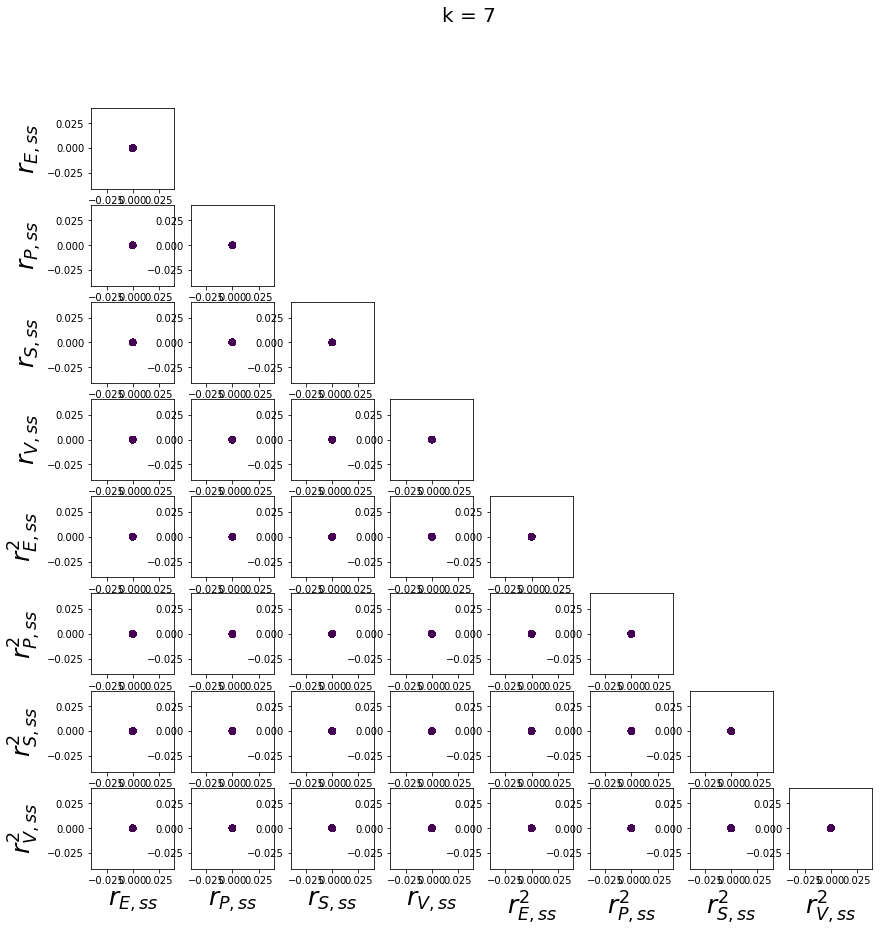

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


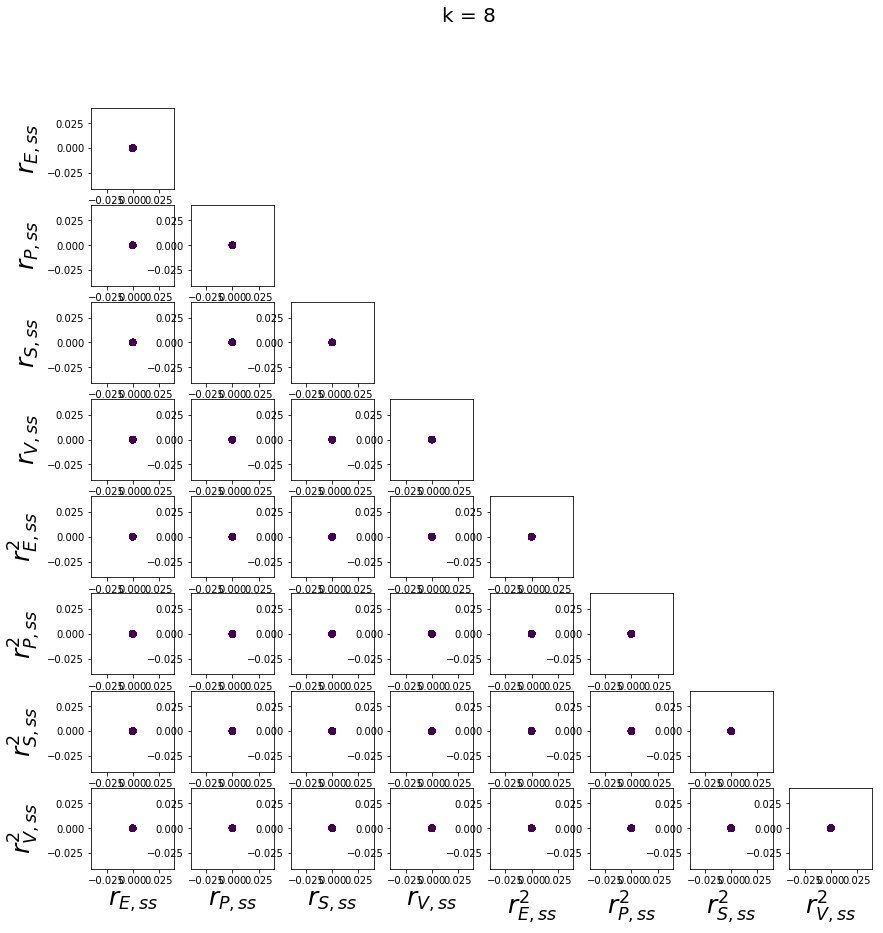

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


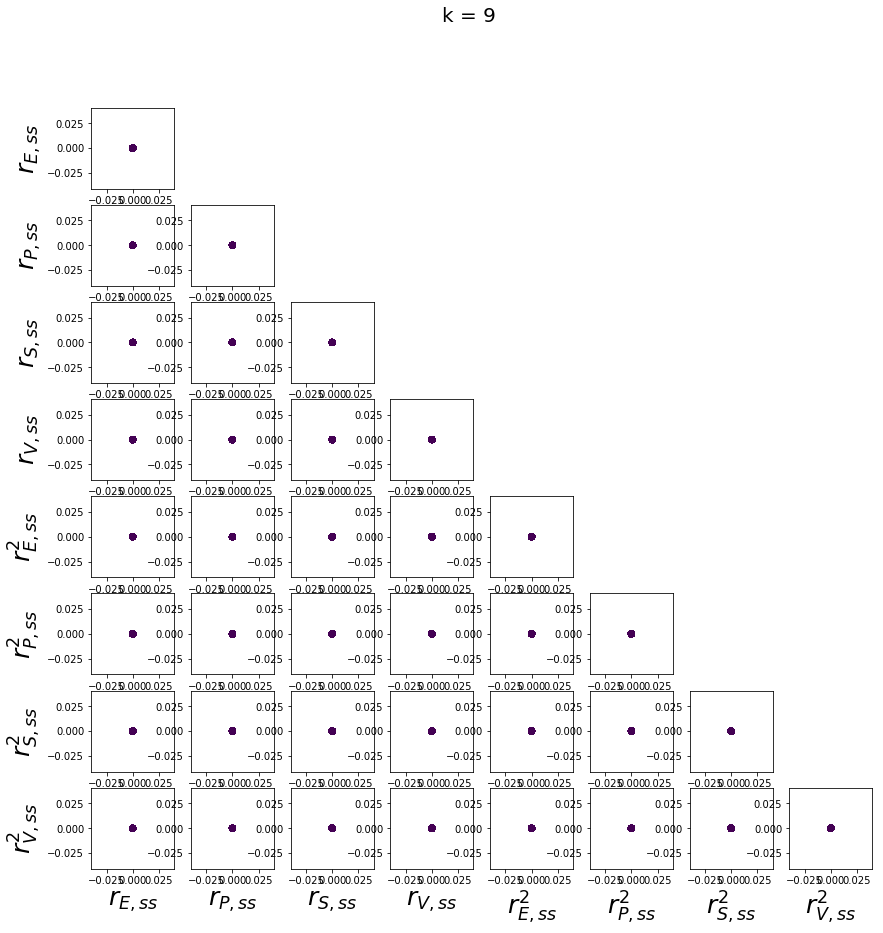

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


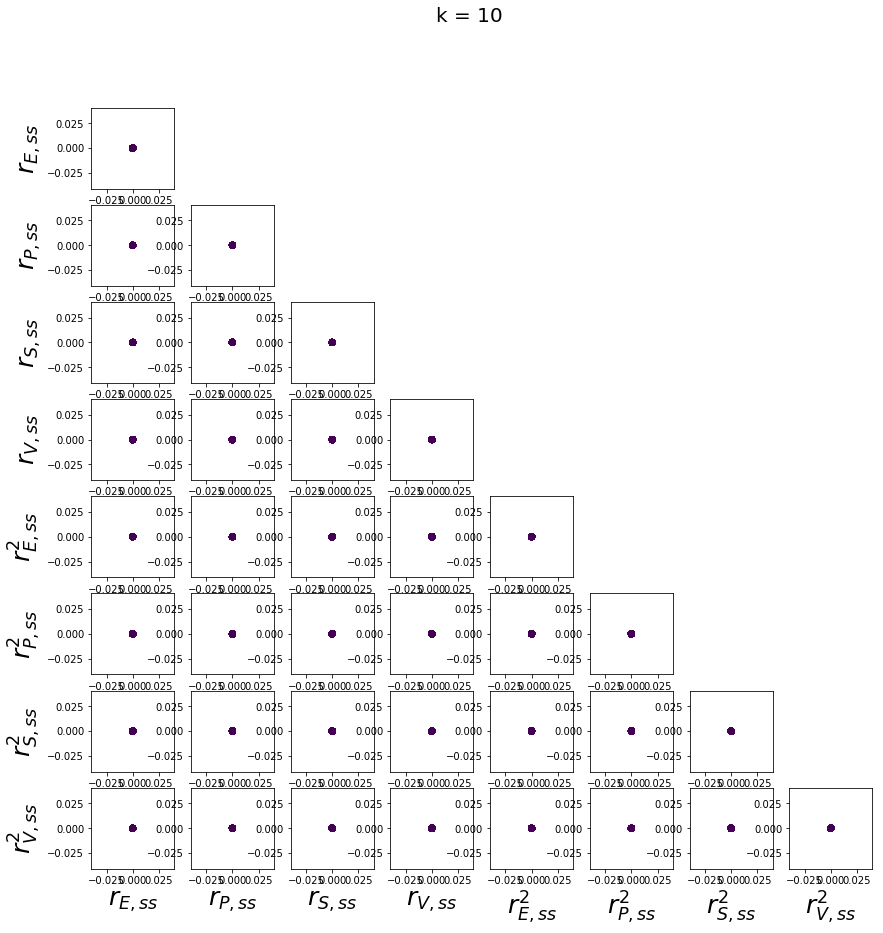

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


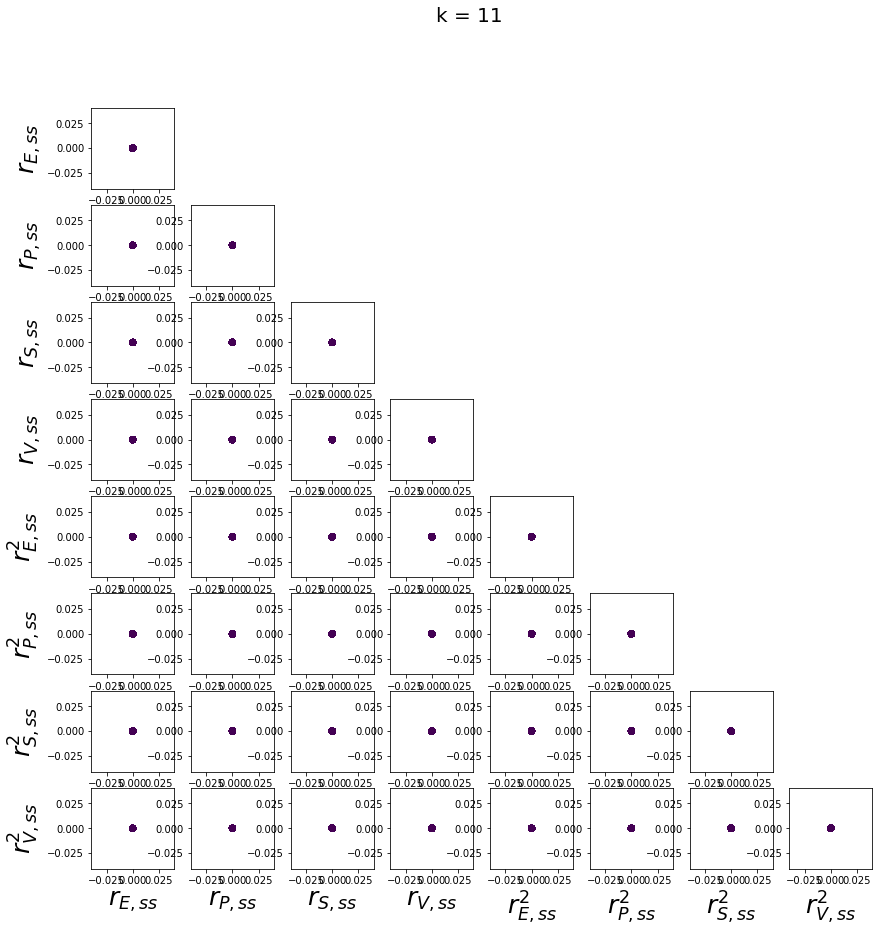

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


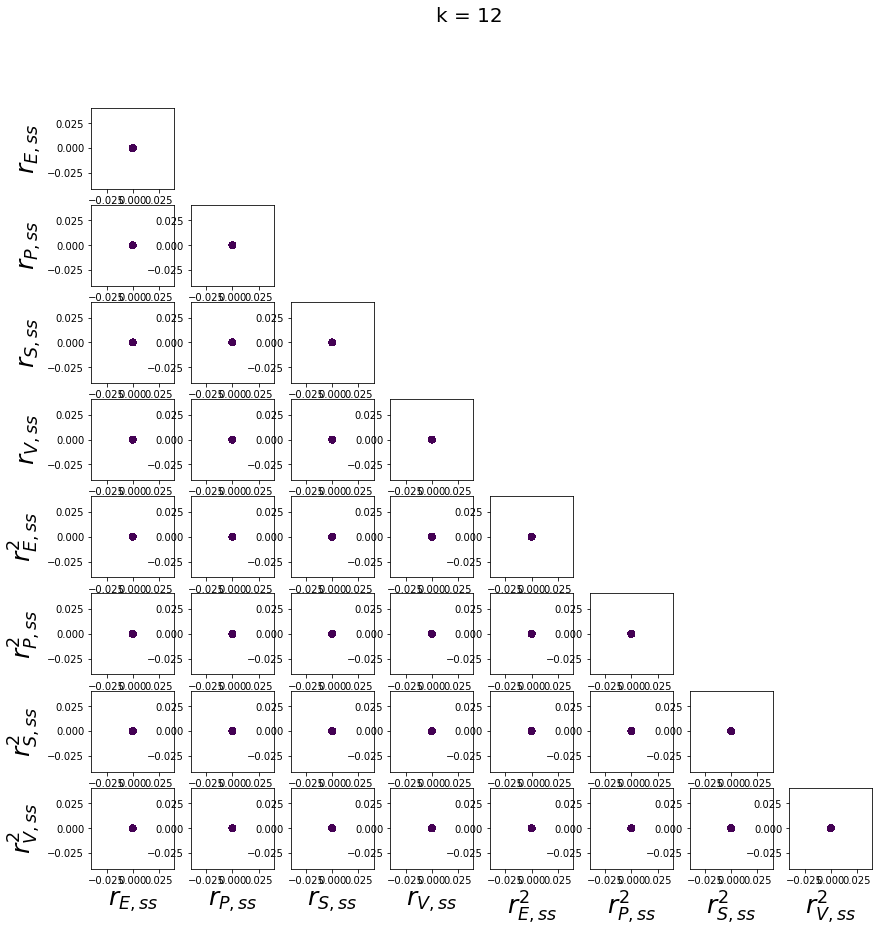

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


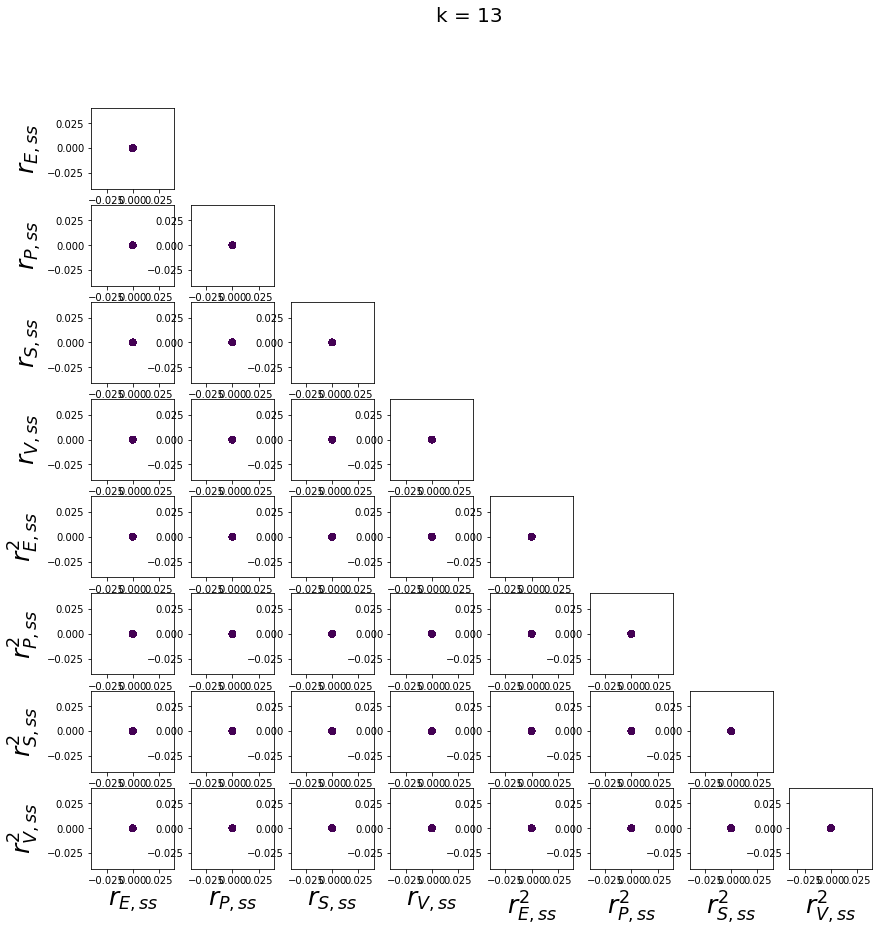

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


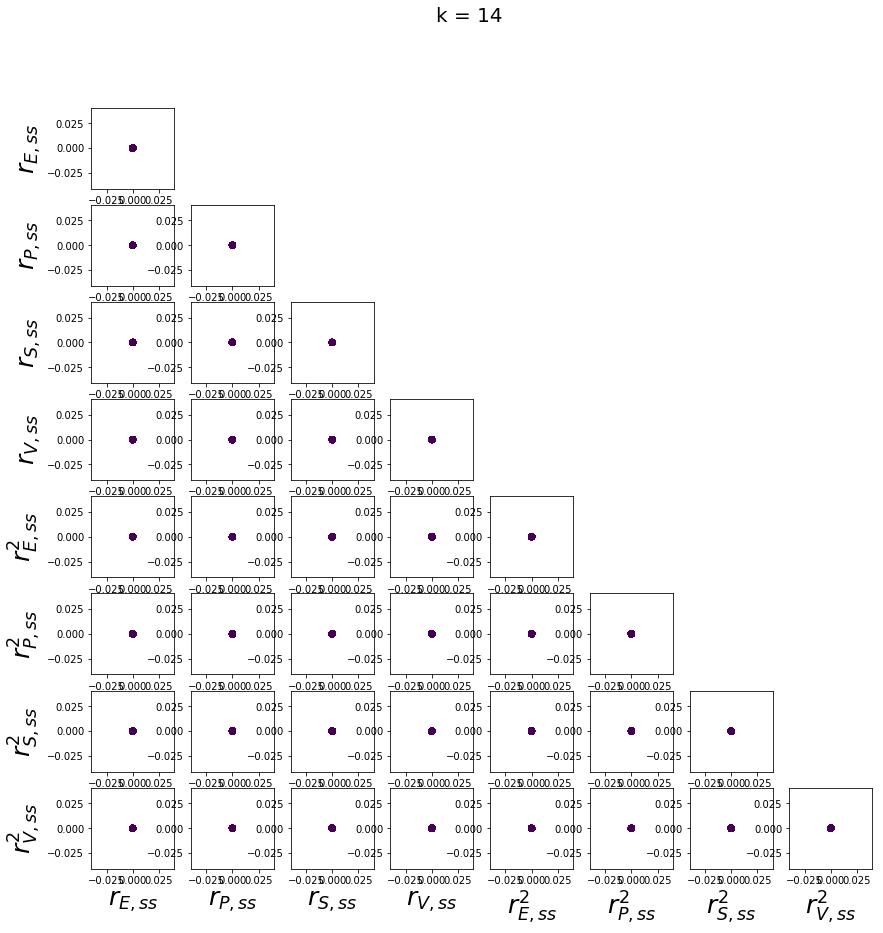

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


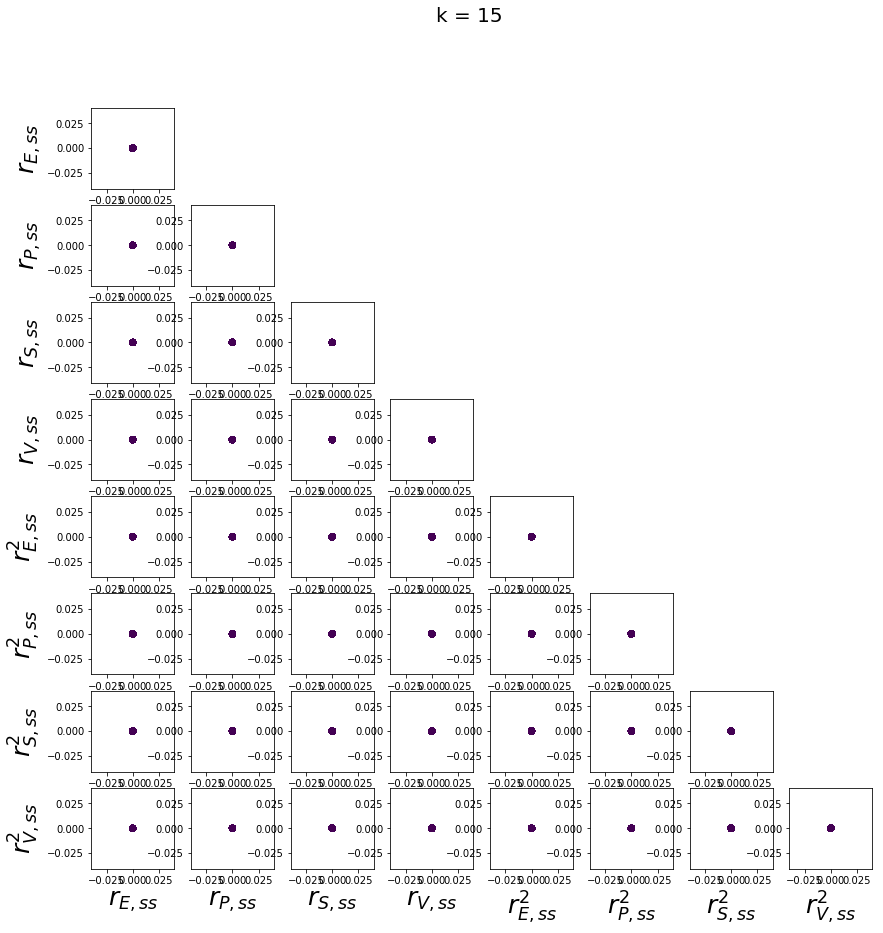

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


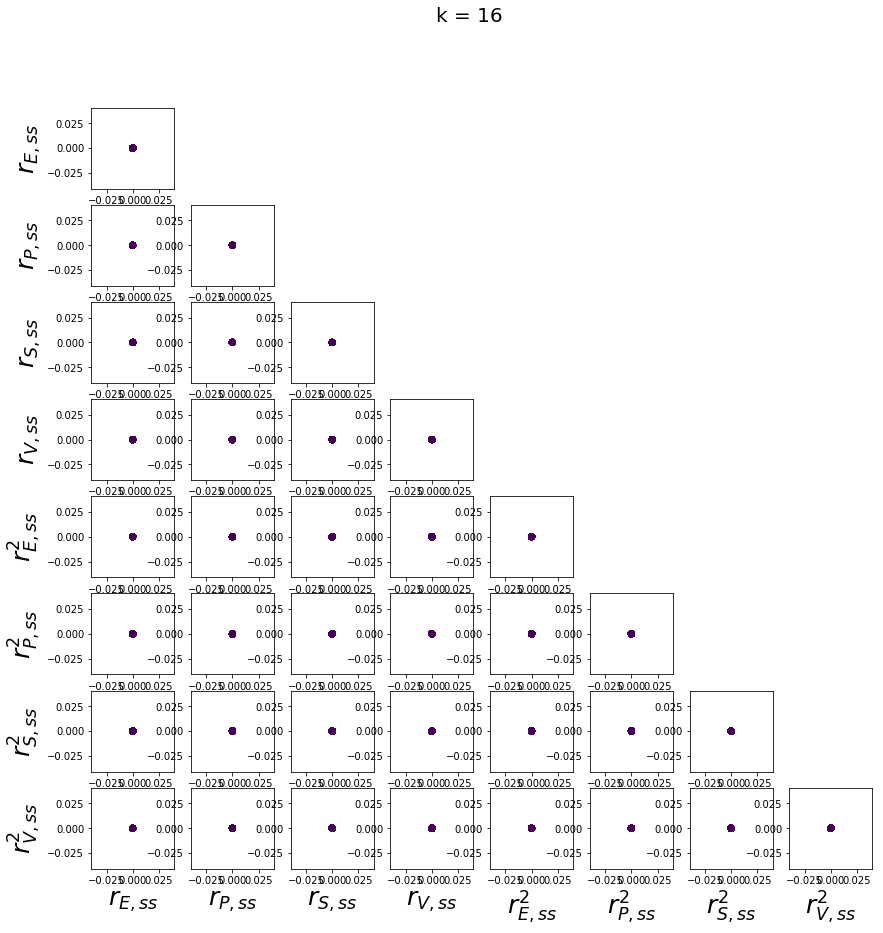

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


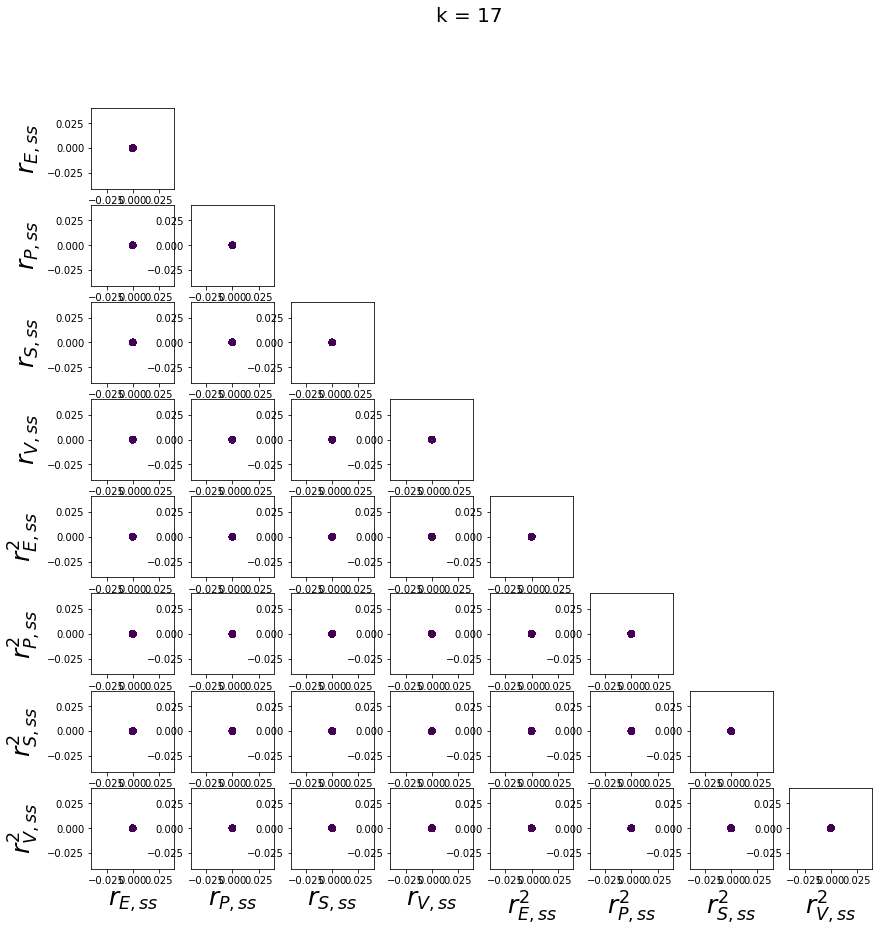

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


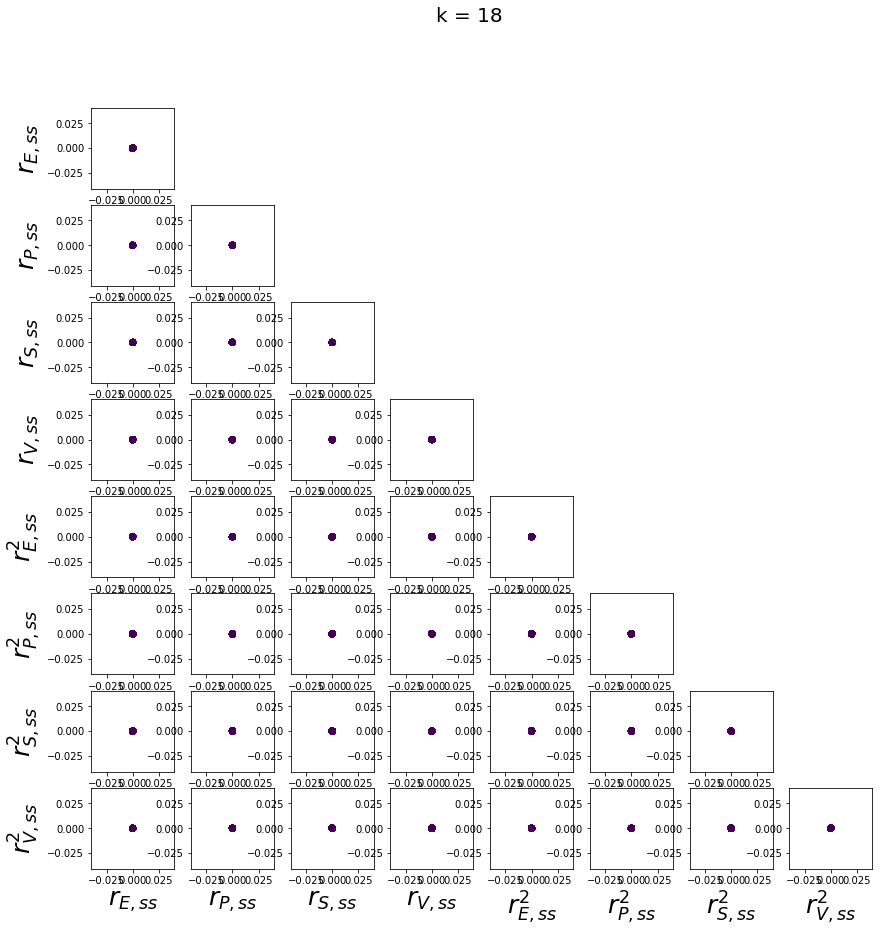

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


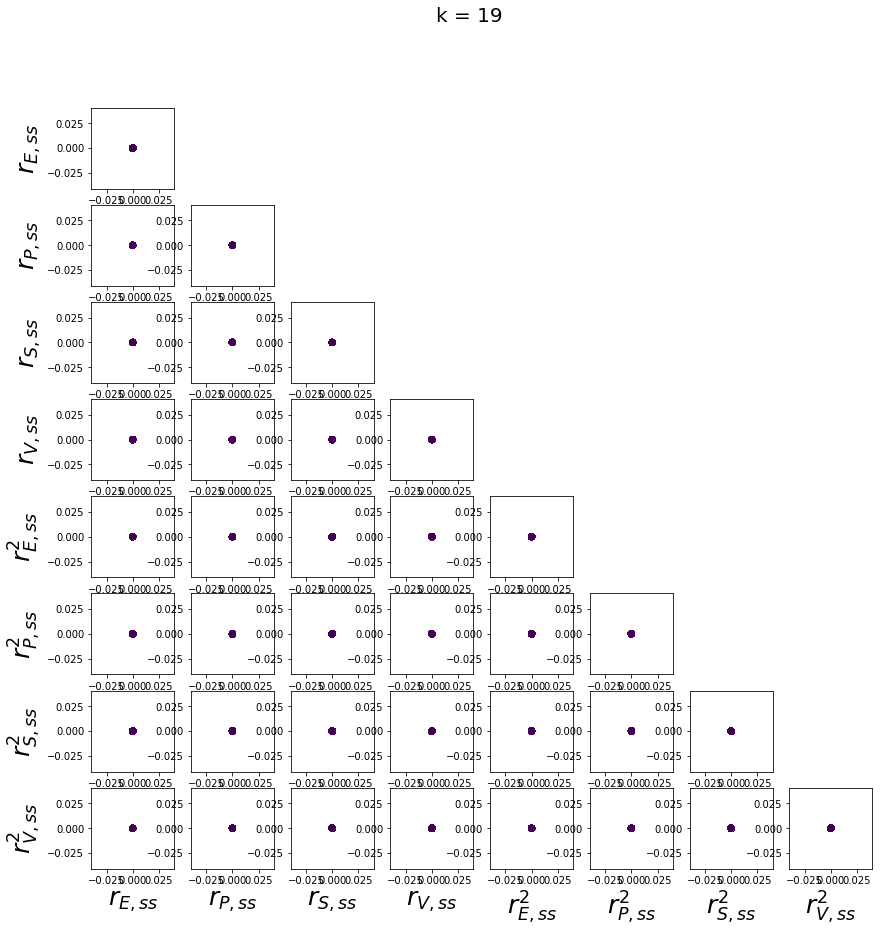

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0


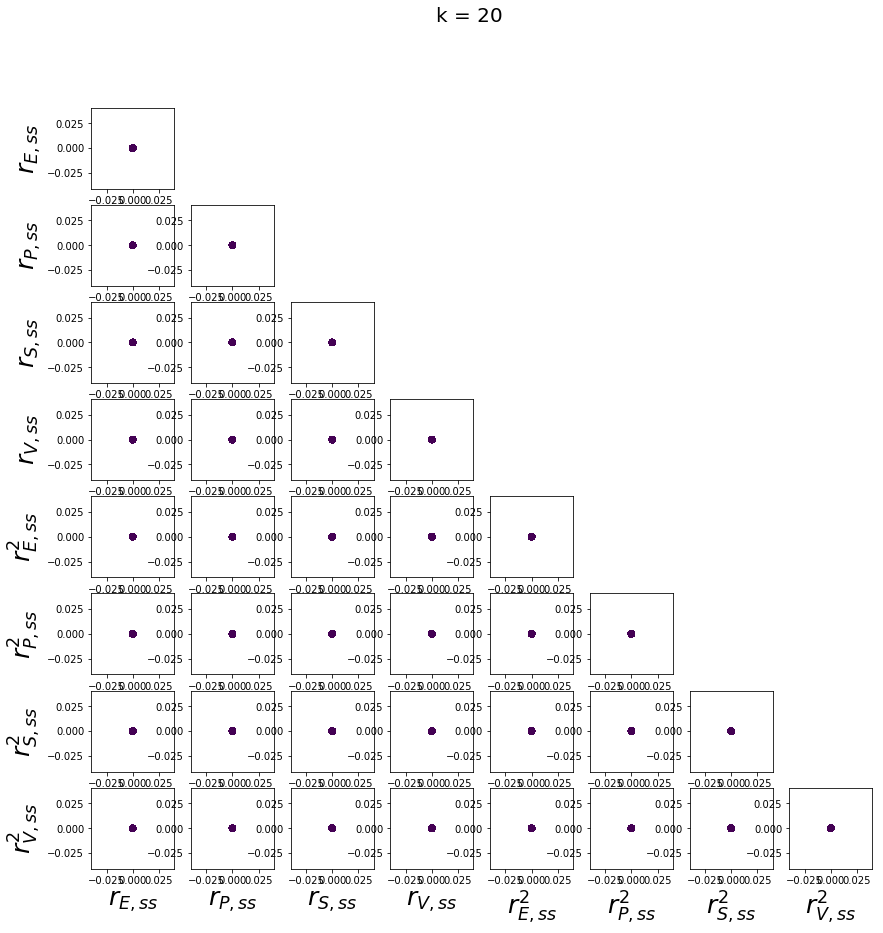

In [11]:
T_phis = npzfile['T_phis'];
labels = [r'$r_{E,ss}$', r'$r_{P,ss}$', r'$r_{S,ss}$', r'$r_{V,ss}$', \
          r'$r_{E,ss}^2$', r'$r_{P,ss}^2$', r'$r_{S,ss}^2$', r'$r_{V,ss}^2$']

for k in range(k_max+1):
    fontsize = 25;
    figsize = (14, 14);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        plt.subplot(1, system.D, i+1);
        for j in range(system.D):
            ind = system.D*i + j + 1;
            plt.subplot(system.D, system.D, ind);
            plt.scatter(T_phis[k,:,j], T_phis[k, :, i], c=log_q_phis[k]);
            if (i==(system.D-1)):
                plt.xlabel(labels[j], fontsize=fontsize);
            if (j==0):
                plt.ylabel(labels[i], fontsize=fontsize);
        print(np.mean(T_phis[k,:,i]),0);
    plt.suptitle('k = %d' % k, fontsize=20);

    plt.show();
